
# Capstone Week 1

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 99)

In [188]:
df18 = pd.read_excel("Transaction data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions19")


# Steps
- Understand what one row of data respresents: Finacial Advisor
- Understand what the columns represents : Acitivity based features
- Look at the data types: All floats, except for 'CONTACTID' and 'refresh_date'
- Check for missing values: replace with zeros
- Check target variable: Look at its distrubution
- Check the feature distrubutions an correlations
    

In [189]:
COLUMNS_TO_DROP = ["CONTACT_ID", "refresh_date"]

In [190]:
df18.head()

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  \
0               0047433               21.0                    38.0   
1               4461312                NaN                     NaN   
2               4491079                NaN                     NaN   
3               0107408               20.0                     NaN   
4  85101140503769936458                NaN                     NaN   

   no_of_sales_12M_10K  no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
0                  NaN                       1.0                     5.0   
1                  NaN                       NaN                     NaN   
2                  NaN                       NaN                     NaN   
3                  2.0                       NaN                     1.0   
4                  NaN                       NaN                     NaN   

   no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
0                         5.0                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       1.0   
4                         NaN                       NaN   

   no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
0                             1.0                          2.0   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          1.0   
4                             NaN                          NaN   

   no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
0                              2.0                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             1.0   
4                              NaN                             NaN   

   no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
0                                  1.0              8.0               1.0   
1                                  NaN              1.0               1.0   
2                                  NaN              NaN               NaN   
3                                  NaN              1.0               1.0   
4                                  NaN              NaN               NaN   

         AUM  sales_curr  sales_12M  redemption_curr  redemption_12M  \
0  237480.11       250.0    19682.0        -1496.745     -102496.165   
1   19629.00         NaN        NaN              NaN             NaN   
2    1758.70         NaN        NaN              NaN             NaN   
3   57943.00      5459.0    52484.0              NaN             NaN   
4   -8573.59         NaN        NaN              NaN             NaN   

   new_Fund_added_12M  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
0                 NaN      -47342.32                 284737.93   
1                 NaN           0.00                  19629.00   
2                 NaN           0.00                   1758.70   
3                 1.0           0.00                      0.00   
4                 NaN       -8573.59                      0.00   

   aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
0                         84.5           0.0              0.0   
1                          0.0           0.0              0.0   
2                          0.0           0.0              0.0   
3                      57943.0           0.0              0.0   
4                          0.0           0.0              0.0   

   aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
0                        0.0                 0.0            0.0        0.0   
1                        0.0                 0.0            0.0        0.0   
2                        0.0                

In [191]:
df18.shape

(10005, 38)

In [192]:
df18['AUM'].describe()

count    9.420000e+03
mean     3.617280e+05
std      3.344579e+06
min     -7.713610e+07
25%     -3.560694e+04
50%      2.139880e+03
75%      1.747293e+05
max      2.232411e+08
Name: AUM, dtype: float64

In [193]:
df18.dtypes

CONTACT_ID                                     object
no_of_sales_12M_1                             float64
no_of_Redemption_12M_1                        float64
no_of_sales_12M_10K                           float64
no_of_Redemption_12M_10K                      float64
no_of_funds_sold_12M_1                        float64
no_of_funds_redeemed_12M_1                    float64
no_of_fund_sales_12M_10K                      float64
no_of_funds_Redemption_12M_10K                float64
no_of_assetclass_sold_12M_1                   float64
no_of_assetclass_redeemed_12M_1               float64
no_of_assetclass_sales_12M_10K                float64
no_of_assetclass_Redemption_12M_10K           float64
No_of_fund_curr                               float64
No_of_asset_curr                              float64
AUM                                           float64
sales_curr                                    float64
sales_12M                                     float64
redemption_curr             

# Check for missing values
- Fill 'NaN' with '0' because They represent no activity



### Investigate target variable

<AxesSubplot:>

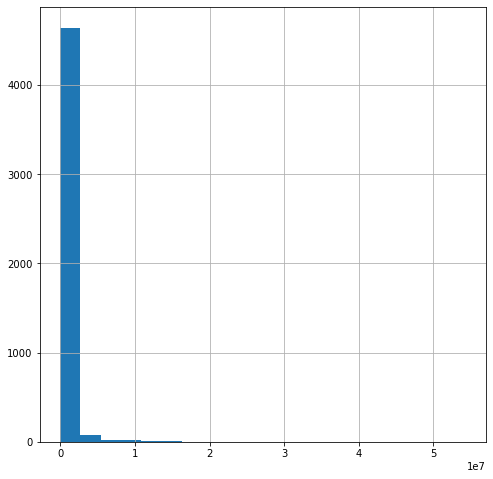

In [194]:
df18['sales_12M'].hist(figsize=(8,8), bins=20)

In [195]:
df18['sales_12M'].describe()

count    4.768000e+03
mean     3.632014e+05
std      1.615194e+06
min     -3.518727e+04
25%      5.731465e+03
50%      3.751729e+04
75%      2.043533e+05
max      5.434650e+07
Name: sales_12M, dtype: float64

# Investigate Features

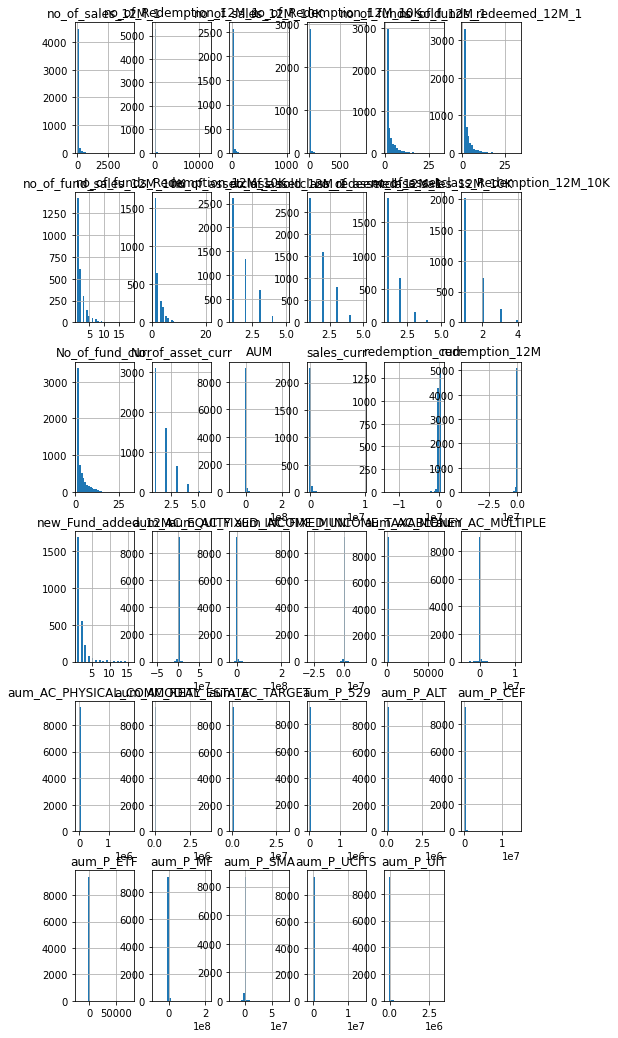

In [196]:
df18.drop(columns='sales_12M').hist(figsize=(8,18), bins=30);

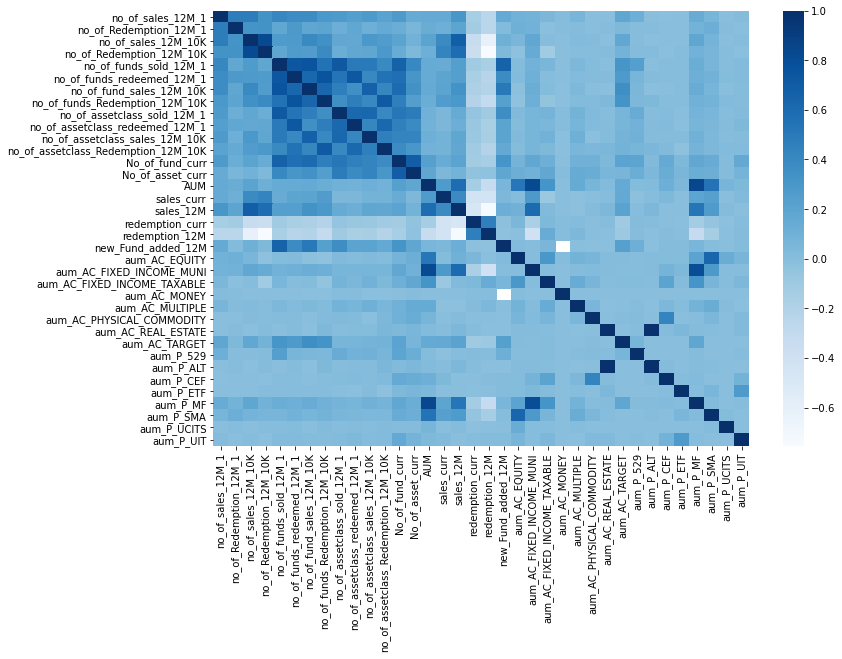

In [197]:
fig, axes = plt.subplots(figsize=(12,8))
sns.heatmap(df18.corr(), axes=axes, cmap='Blues');


# Get first baseline model

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
df18.columns

Index(['CONTACT_ID', 'no_of_sales_12M_1', 'no_of_Redemption_12M_1',
       'no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
       'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1',
       'no_of_fund_sales_12M_10K', 'no_of_funds_Redemption_12M_10K',
       'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
       'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
       'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M',
       'redemption_curr', 'redemption_12M', 'new_Fund_added_12M',
       'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
       'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
       'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
       'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
       'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT', 'refresh_date'],
      dtype='object')

In [200]:
def combine_curr_and_12M(df):
    df['sales_12M_inclusive'] = df['sales_curr'] + df['sales_12M']
    df = df.drop(columns=['sales_curr', 'sales_12M'])
    return df

In [201]:
df18_targ = combine_curr_and_12M(df18)

In [202]:
num_cols = [col for col in df18_targ.columns if col not in COLUMNS_TO_DROP]

In [203]:
#Seperate target from features
X = df18_targ[num_cols].drop(columns='sales_12M_inclusive').copy()
y = df18_targ['sales_12M_inclusive']

In [204]:
#perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fill NA values in training

In [205]:
def fillna_values(df):
    df = df.fillna(0)
    return df

In [206]:
X_train = fillna_values(X_train)
y_train = fillna_values(y_train)

# Create first model

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate 

In [208]:
lr = LinearRegression()
lr.fit(X_train.fillna(0), y_train)

LinearRegression()

In [209]:
cross_validate(lr, X_train, y_train, cv=5)

{'fit_time': array([0.00656605, 0.00535798, 0.00534701, 0.00991797, 0.00743508]),
 'score_time': array([0.00212908, 0.00215197, 0.00318193, 0.00334501, 0.00248194]),
 'test_score': array([-0.221037  ,  0.62877843,  0.55411882,  0.70780388,  0.54274558])}

## Capstone Objectives:
- Assist sales and marketing by improving their targeting
- Predict sales for 2019 using the data for 2018

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

pd.set_option('display.max_columns', 50)

# Remember the data science workflow
<img src="../data_science_workflow.png" width="400px">

# Read Data

In [211]:
# df18 = pd.read_excel("Transaction data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions19")

In [212]:
df19.head(2)

CONTACT_ID  sales_12M  new_Fund_added_12M refresh_date
0  10761171685327323628     4484.2                 NaN   2019-12-31
1  85102132684855362312        NaN                 NaN   2019-12-31

In [213]:
df18.head(2)

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
0    0047433               21.0                    38.0                  NaN   
1    4461312                NaN                     NaN                  NaN   

   no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
0                       1.0                     5.0   
1                       NaN                     NaN   

   no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
0                         5.0                       NaN   
1                         NaN                       NaN   

   no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
0                             1.0                          2.0   
1                             NaN                          NaN   

   no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
0                              2.0                             NaN   
1                              NaN                             NaN   

   no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
0                                  1.0              8.0               1.0   
1                                  NaN              1.0               1.0   

         AUM  sales_curr  sales_12M  redemption_curr  redemption_12M  \
0  237480.11       250.0    19682.0        -1496.745     -102496.165   
1   19629.00         NaN        NaN              NaN             NaN   

   new_Fund_added_12M  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
0                 NaN      -47342.32                 284737.93   
1                 NaN           0.00                  19629.00   

   aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
0                         84.5           0.0              0.0   
1                          0.0           0.0              0.0   

   aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
0                        0.0                 0.0            0.0        0.0   
1                        0.0                 0.0            0.0        0.0   

   aum_P_ALT  aum_P_CEF  aum_P_ETF   aum_P_MF  aum_P_SMA  aum_P_UCITS  \
0        0.0        0.0        0.0  122866.04  114614.07          0.0   
1        0.0        0.0        0.0   19629.00       0.00          0.0   

   aum_P_UIT refresh_date  sales_12M_inclusive  
0        0.0   2018-12-31              19932.0  
1        0.0   2018-12-31                  NaN

# Merge 2018 and 2019

In [214]:
print(df18.shape)
print(df19.shape)

(10005, 39)
(10005, 4)


In [215]:
df = pd.merge(
    df18,
    df19,
    on='CONTACT_ID',
    suffixes=['_2018', '_2019']
)
print(df.shape)

(10005, 42)


In [216]:
df.head()

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  \
0               0047433               21.0                    38.0   
1               4461312                NaN                     NaN   
2               4491079                NaN                     NaN   
3               0107408               20.0                     NaN   
4  85101140503769936458                NaN                     NaN   

   no_of_sales_12M_10K  no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
0                  NaN                       1.0                     5.0   
1                  NaN                       NaN                     NaN   
2                  NaN                       NaN                     NaN   
3                  2.0                       NaN                     1.0   
4                  NaN                       NaN                     NaN   

   no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
0                         5.0                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       1.0   
4                         NaN                       NaN   

   no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
0                             1.0                          2.0   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          1.0   
4                             NaN                          NaN   

   no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
0                              2.0                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             1.0   
4                              NaN                             NaN   

   no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
0                                  1.0              8.0               1.0   
1                                  NaN              1.0               1.0   
2                                  NaN              NaN               NaN   
3                                  NaN              1.0               1.0   
4                                  NaN              NaN               NaN   

         AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
0  237480.11       250.0         19682.0        -1496.745     -102496.165   
1   19629.00         NaN             NaN              NaN             NaN   
2    1758.70         NaN             NaN              NaN             NaN   
3   57943.00      5459.0         52484.0              NaN             NaN   
4   -8573.59         NaN             NaN              NaN             NaN   

   new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
0                      NaN      -47342.32                 284737.93   
1                      NaN           0.00                  19629.00   
2                      NaN           0.00                   1758.70   
3                      1.0           0.00                      0.00   
4                      NaN       -8573.59                      0.00   

   aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
0                         84.5           0.0              0.0   
1                          0.0           0.0              0.0   
2                          0.0           0.0              0.0   
3                      57943.0           0.0              0.0   
4                          0.0           0.0              0.0   

   aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
0                        0.0                 0.0            0.0        0.0   
1                        0.0                 0.0            0.

# Data Cleaning


Before you change ANYTHING with the data, do your train-test split

In [217]:
adviser_lookup = {idx: contact_id for idx, contact_id in enumerate(df['CONTACT_ID'])}

In [218]:
X = df.drop(['sales_12M_2019', 'new_Fund_added_12M_2019'], axis=1)
y = df['sales_12M_2019']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [220]:
X_train['refresh_date_2019'].value_counts()

2019-12-31    7503
Name: refresh_date_2019, dtype: int64

Let's create functions that do some basic housekeeping

In [221]:
#Make a variable to keep all of the columns we want to drop
COLS_TO_DROP = ['refresh_date_2019', 'refresh_date_2018', 'CONTACT_ID',]

COLS_TO_KEEP = ['no_of_sales_12M_1', 'no_of_Redemption_12M_1','no_of_sales_12M_10K','no_of_Redemption_12M_10K',
                'no_of_funds_sold_12M_1', 'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K', 
                'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1', 'no_of_assetclass_redeemed_12M_1',
                'no_of_assetclass_sales_12M_10K', 'no_of_assetclass_Redemption_12M_10K',
                'No_of_fund_curr', 'No_of_asset_curr', 'AUM', 'sales_curr',
                'sales_12M_2018', 'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018', 
                'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI', 'aum_AC_FIXED_INCOME_TAXABLE',
                'aum_AC_MONEY', 'aum_AC_MULTIPLE', 'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 
                'aum_AC_TARGET', 'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF', 'aum_P_SMA',
                'aum_P_UCITS', 'sales_12M_inclusive', 'aum_P_UIT']


In [222]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TODROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()

In [223]:
X_train1 = extract_columns(X_train)
X_train1.head()

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
4081                7.0                     NaN                  NaN   
184                27.0                     7.0                  NaN   
186                 3.0                     NaN                  2.0   
230                42.0                    14.0                  1.0   
6327                NaN                     1.0                  NaN   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
4081                       NaN                     1.0   
184                        1.0                     6.0   
186                        NaN                     1.0   
230                        1.0                     1.0   
6327                       NaN                     NaN   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
4081                         NaN                       NaN   
184                          5.0                       NaN   
186                          NaN                       1.0   
230                          2.0                       1.0   
6327                         1.0                       NaN   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
4081                             NaN                          1.0   
184                              1.0                          2.0   
186                              NaN                          1.0   
230                              1.0                          1.0   
6327                             NaN                          NaN   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
4081                              NaN                             NaN   
184                               2.0                             NaN   
186                               NaN                             1.0   
230                               2.0                             1.0   
6327                              1.0                             NaN   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
4081                                  NaN              1.0               1.0   
184                                   1.0             12.0               2.0   
186                                   NaN              2.0               1.0   
230                                   1.0              2.0               1.0   
6327                                  NaN              NaN               NaN   

             AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
4081    30837.46       23.95          167.57              NaN             NaN   
184    -90841.55      230.79        16380.65              NaN       -62861.42   
186   4330024.49         NaN       551269.50              NaN             NaN   
230  -4025438.07         NaN        83491.48              NaN      -198505.61   
6327   -52438.02         NaN             NaN              NaN        -3808.12   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
4081                      1.0           0.00                  30645.94   
184                       5.0      112664.50                -250621.31   
186                       NaN     4501498.80                      0.00   
230                       NaN       50498.62               -4069339.40   
6327                      NaN       -3808.12                 -48629.90   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
4081                          0.0           0.0             0.00   
184                           0.0           0.0             0.00   
186                           0.0           0.0       -171474.31   
230                           0.0           0.0             0.00   
6327                          0.0           0.0             0.00   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
4081                       0.00                 0.0         191.52     191.52   
184          

Let's check out those missing values again

In [224]:
X_train1.isnull().sum()

no_of_sales_12M_1                      3906
no_of_Redemption_12M_1                 3468
no_of_sales_12M_10K                    5453
no_of_Redemption_12M_10K               5281
no_of_funds_sold_12M_1                 3906
no_of_funds_redeemed_12M_1             3468
no_of_fund_sales_12M_10K               5453
no_of_funds_Redemption_12M_10K         5281
no_of_assetclass_sold_12M_1            3906
no_of_assetclass_redeemed_12M_1        3468
no_of_assetclass_sales_12M_10K         5453
no_of_assetclass_Redemption_12M_10K    5281
No_of_fund_curr                        2825
No_of_asset_curr                       3287
AUM                                     434
sales_curr                             5664
sales_12M_2018                         3901
redemption_curr                        5567
redemption_12M                         3452
new_Fund_added_12M_2018                5462
aum_AC_EQUITY                           434
aum_AC_FIXED_INCOME_MUNI                434
aum_AC_FIXED_INCOME_TAXABLE     

**Make function to fill those missing values with 0. We can refactor this function later if we like**

In [225]:
def fillna_values(df):
    
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    num_df = df.select_dtypes(include=['number']).fillna(0)
    non_num_df = df.select_dtypes(exclude=['number'])
    return pd.concat([num_df, non_num_df], axis=1)

In [226]:
X_train2 = fillna_values(X_train1)
y_train = fillna_values(y_train)

In [227]:
X_train2.head()

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
4081                7.0                     0.0                  0.0   
184                27.0                     7.0                  0.0   
186                 3.0                     0.0                  2.0   
230                42.0                    14.0                  1.0   
6327                0.0                     1.0                  0.0   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
4081                       0.0                     1.0   
184                        1.0                     6.0   
186                        0.0                     1.0   
230                        1.0                     1.0   
6327                       0.0                     0.0   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
4081                         0.0                       0.0   
184                          5.0                       0.0   
186                          0.0                       1.0   
230                          2.0                       1.0   
6327                         1.0                       0.0   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
4081                             0.0                          1.0   
184                              1.0                          2.0   
186                              0.0                          1.0   
230                              1.0                          1.0   
6327                             0.0                          0.0   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
4081                              0.0                             0.0   
184                               2.0                             0.0   
186                               0.0                             1.0   
230                               2.0                             1.0   
6327                              1.0                             0.0   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
4081                                  0.0              1.0               1.0   
184                                   1.0             12.0               2.0   
186                                   0.0              2.0               1.0   
230                                   1.0              2.0               1.0   
6327                                  0.0              0.0               0.0   

             AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
4081    30837.46       23.95          167.57              0.0            0.00   
184    -90841.55      230.79        16380.65              0.0       -62861.42   
186   4330024.49        0.00       551269.50              0.0            0.00   
230  -4025438.07        0.00        83491.48              0.0      -198505.61   
6327   -52438.02        0.00            0.00              0.0        -3808.12   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
4081                      1.0           0.00                  30645.94   
184                       5.0      112664.50                -250621.31   
186                       0.0     4501498.80                      0.00   
230                       0.0       50498.62               -4069339.40   
6327                      0.0       -3808.12                 -48629.90   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
4081                          0.0           0.0             0.00   
184                           0.0           0.0             0.00   
186                           0.0           0.0       -171474.31   
230                           0.0           0.0             0.00   
6327                          0.0           0.0             0.00   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
4081                       0.00                 0.0         191.52     191.52   
184          

In [228]:
X_train2.isnull().sum()

no_of_sales_12M_1                      0
no_of_Redemption_12M_1                 0
no_of_sales_12M_10K                    0
no_of_Redemption_12M_10K               0
no_of_funds_sold_12M_1                 0
no_of_funds_redeemed_12M_1             0
no_of_fund_sales_12M_10K               0
no_of_funds_Redemption_12M_10K         0
no_of_assetclass_sold_12M_1            0
no_of_assetclass_redeemed_12M_1        0
no_of_assetclass_sales_12M_10K         0
no_of_assetclass_Redemption_12M_10K    0
No_of_fund_curr                        0
No_of_asset_curr                       0
AUM                                    0
sales_curr                             0
sales_12M_2018                         0
redemption_curr                        0
redemption_12M                         0
new_Fund_added_12M_2018                0
aum_AC_EQUITY                          0
aum_AC_FIXED_INCOME_MUNI               0
aum_AC_FIXED_INCOME_TAXABLE            0
aum_AC_MONEY                           0
aum_AC_MULTIPLE 

# Standardizr Data

In [229]:
ss = StandardScaler()
X_train3 = pd.DataFrame(
    ss.fit_transform(X_train2),
    index=X_train2.index,
    columns=X_train2.columns)
X_train3.head()

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
4081          -0.131327               -0.100418            -0.210641   
184            0.064598               -0.068134            -0.210641   
186           -0.170512               -0.100418            -0.024389   
230            0.211542               -0.035851            -0.117515   
6327          -0.199901               -0.095806            -0.210641   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
4081                 -0.198657               -0.153437   
184                  -0.087441                1.954284   
186                  -0.198657               -0.153437   
230                  -0.087441               -0.153437   
6327                 -0.198657               -0.574981   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
4081                   -0.626787                 -0.430000   
184                     1.399401                 -0.430000   
186                    -0.626787                  0.320475   
230                     0.183688                  0.320475   
6327                   -0.221549                 -0.430000   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
4081                       -0.441804                     0.201462   
184                         0.296800                     1.188127   
186                        -0.441804                     0.201462   
230                         0.296800                     0.201462   
6327                       -0.441804                    -0.785202   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
4081                        -0.868033                       -0.534630   
184                          1.034363                       -0.534630   
186                         -0.868033                        0.857226   
230                          1.034363                        0.857226   
6327                         0.083165                       -0.534630   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
4081                            -0.562039        -0.372488          0.065543   
184                              0.777535         3.177868          1.018590   
186                             -0.562039        -0.049728          0.065543   
230                              0.777535        -0.049728          0.065543   
6327                            -0.562039        -0.695247         -0.887503   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
4081 -0.088949   -0.083247       -0.154606         0.090417        0.156246   
184  -0.124508   -0.082219       -0.139641         0.090417        0.071676   
186   1.167409   -0.083366        0.354063         0.090417        0.156246   
230  -1.274321   -0.083366       -0.077698         0.090417       -0.110813   
6327 -0.113285   -0.083366       -0.154761         0.090417        0.151123   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
4081                 0.436844      -0.026493                 -0.070601   
184                  3.848384       0.050153                 -0.166822   
186                 -0.416042       3.035922                 -0.081085   
230                 -0.416042       0.007861                 -1.473199   
6327                -0.416042      -0.029084                 -0.097721   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
4081                    -0.059801     -0.012455        -0.023802   
184                     -0.059801     -0.012455        -0.023802   
186                     -0.059801     -0.012455        -0.689998   
230                     -0.059801     -0.012455        -0.023802   
6327                    -0.059801     -0.012455        -0.023802   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
4081                  -0.041821           -0.037655      -0.040002  -0.070366   
184                   -0.

# Create PIPELINE
*1.extract_columns to drop unneeded columns*

*2.fillna_values to replace nans with 0*

*3.Standardize data*

In [230]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [231]:
extract_columns_trans = FunctionTransformer(extract_columns, validate=False)
fillna_values_trans = FunctionTransformer(fillna_values, validate=False)

In [232]:
X_train.head(2)

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  \
4081  85201151104552899957                7.0                     NaN   
184                0210460               27.0                     7.0   

      no_of_sales_12M_10K  no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
4081                  NaN                       NaN                     1.0   
184                   NaN                       1.0                     6.0   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
4081                         NaN                       NaN   
184                          5.0                       NaN   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
4081                             NaN                          1.0   
184                              1.0                          2.0   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
4081                              NaN                             NaN   
184                               2.0                             NaN   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
4081                                  NaN              1.0               1.0   
184                                   1.0             12.0               2.0   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
4081  30837.46       23.95          167.57              NaN             NaN   
184  -90841.55      230.79        16380.65              NaN       -62861.42   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
4081                      1.0            0.0                  30645.94   
184                       5.0       112664.5                -250621.31   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
4081                          0.0           0.0              0.0   
184                           0.0           0.0              0.0   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
4081                        0.0                 0.0         191.52     191.52   
184                         0.0                 0.0       47115.26   47115.26   

      aum_P_ALT  aum_P_CEF  aum_P_ETF   aum_P_MF  aum_P_SMA  aum_P_UCITS  \
4081        0.0        0.0        0.0   30645.94       0.00          0.0   
184         0.0        0.0        0.0 -268165.38 -178243.12          0.0   

      aum_P_UIT refresh_date_2018  sales_12M_inclusive refresh_date_2019  
4081       0.00        2018-12-31               191.52        2019-12-31  
184   308451.69        2018-12-31             16611.44        2019-12-31

In [233]:
extract_columns_trans.transform(X_train).head()

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
4081                7.0                     NaN                  NaN   
184                27.0                     7.0                  NaN   
186                 3.0                     NaN                  2.0   
230                42.0                    14.0                  1.0   
6327                NaN                     1.0                  NaN   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
4081                       NaN                     1.0   
184                        1.0                     6.0   
186                        NaN                     1.0   
230                        1.0                     1.0   
6327                       NaN                     NaN   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
4081                         NaN                       NaN   
184                          5.0                       NaN   
186                          NaN                       1.0   
230                          2.0                       1.0   
6327                         1.0                       NaN   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
4081                             NaN                          1.0   
184                              1.0                          2.0   
186                              NaN                          1.0   
230                              1.0                          1.0   
6327                             NaN                          NaN   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
4081                              NaN                             NaN   
184                               2.0                             NaN   
186                               NaN                             1.0   
230                               2.0                             1.0   
6327                              1.0                             NaN   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
4081                                  NaN              1.0               1.0   
184                                   1.0             12.0               2.0   
186                                   NaN              2.0               1.0   
230                                   1.0              2.0               1.0   
6327                                  NaN              NaN               NaN   

             AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
4081    30837.46       23.95          167.57              NaN             NaN   
184    -90841.55      230.79        16380.65              NaN       -62861.42   
186   4330024.49         NaN       551269.50              NaN             NaN   
230  -4025438.07         NaN        83491.48              NaN      -198505.61   
6327   -52438.02         NaN             NaN              NaN        -3808.12   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
4081                      1.0           0.00                  30645.94   
184                       5.0      112664.50                -250621.31   
186                       NaN     4501498.80                      0.00   
230                       NaN       50498.62               -4069339.40   
6327                      NaN       -3808.12                 -48629.90   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
4081                          0.0           0.0             0.00   
184                           0.0           0.0             0.00   
186                           0.0           0.0       -171474.31   
230                           0.0           0.0             0.00   
6327                          0.0           0.0             0.00   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
4081                       0.00                 0.0         191.52     191.52   
184          

In [234]:
fillna_values_trans.transform(X_train).head()

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
4081                7.0                     0.0                  0.0   
184                27.0                     7.0                  0.0   
186                 3.0                     0.0                  2.0   
230                42.0                    14.0                  1.0   
6327                0.0                     1.0                  0.0   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
4081                       0.0                     1.0   
184                        1.0                     6.0   
186                        0.0                     1.0   
230                        1.0                     1.0   
6327                       0.0                     0.0   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
4081                         0.0                       0.0   
184                          5.0                       0.0   
186                          0.0                       1.0   
230                          2.0                       1.0   
6327                         1.0                       0.0   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
4081                             0.0                          1.0   
184                              1.0                          2.0   
186                              0.0                          1.0   
230                              1.0                          1.0   
6327                             0.0                          0.0   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
4081                              0.0                             0.0   
184                               2.0                             0.0   
186                               0.0                             1.0   
230                               2.0                             1.0   
6327                              1.0                             0.0   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
4081                                  0.0              1.0               1.0   
184                                   1.0             12.0               2.0   
186                                   0.0              2.0               1.0   
230                                   1.0              2.0               1.0   
6327                                  0.0              0.0               0.0   

             AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
4081    30837.46       23.95          167.57              0.0            0.00   
184    -90841.55      230.79        16380.65              0.0       -62861.42   
186   4330024.49        0.00       551269.50              0.0            0.00   
230  -4025438.07        0.00        83491.48              0.0      -198505.61   
6327   -52438.02        0.00            0.00              0.0        -3808.12   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
4081                      1.0           0.00                  30645.94   
184                       5.0      112664.50                -250621.31   
186                       0.0     4501498.80                      0.00   
230                       0.0       50498.62               -4069339.40   
6327                      0.0       -3808.12                 -48629.90   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
4081                          0.0           0.0             0.00   
184                           0.0           0.0             0.00   
186                           0.0           0.0       -171474.31   
230                           0.0           0.0             0.00   
6327                          0.0           0.0             0.00   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
4081                       0.00                 0.0         191.52     191.52   
184          

In [235]:
pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
 
    
])

In [236]:
pipe.fit(X_train, y_train).transform(X_train)

array([[-0.13132686, -0.10041755, -0.21064088, ..., -0.01655909,
        -0.07003327, -0.13082605],
       [ 0.06459803, -0.06813442, -0.21064088, ..., -0.01655909,
         3.26962865, -0.11580194],
       [-0.17051184, -0.10041755, -0.02438921, ..., -0.01655909,
        -0.07003327, -0.13100129],
       ...,
       [-0.05295691, -0.07735817, -0.21064088, ..., -0.01655909,
        -0.07003327, -0.01187005],
       [-0.19010433, -0.06352255, -0.21064088, ..., -0.01655909,
        -0.07003327, -0.13100129],
       [-0.19990057, -0.10041755, -0.21064088, ..., -0.01655909,
        -0.07003327, -0.13100129]])

In [237]:
X_train4 = pd.DataFrame(
    pipe.fit(X_train, y_train).transform(X_train),
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [238]:
X_train4.head()

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
4081          -0.131327               -0.100418            -0.210641   
184            0.064598               -0.068134            -0.210641   
186           -0.170512               -0.100418            -0.024389   
230            0.211542               -0.035851            -0.117515   
6327          -0.199901               -0.095806            -0.210641   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
4081                 -0.198657               -0.153437   
184                  -0.087441                1.954284   
186                  -0.198657               -0.153437   
230                  -0.087441               -0.153437   
6327                 -0.198657               -0.574981   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
4081                   -0.626787                 -0.430000   
184                     1.399401                 -0.430000   
186                    -0.626787                  0.320475   
230                     0.183688                  0.320475   
6327                   -0.221549                 -0.430000   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
4081                       -0.441804                     0.201462   
184                         0.296800                     1.188127   
186                        -0.441804                     0.201462   
230                         0.296800                     0.201462   
6327                       -0.441804                    -0.785202   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
4081                        -0.868033                       -0.534630   
184                          1.034363                       -0.534630   
186                         -0.868033                        0.857226   
230                          1.034363                        0.857226   
6327                         0.083165                       -0.534630   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
4081                            -0.562039        -0.372488          0.065543   
184                              0.777535         3.177868          1.018590   
186                             -0.562039        -0.049728          0.065543   
230                              0.777535        -0.049728          0.065543   
6327                            -0.562039        -0.695247         -0.887503   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
4081 -0.088949   -0.083247       -0.154606         0.090417        0.156246   
184  -0.124508   -0.082219       -0.139641         0.090417        0.071676   
186   1.167409   -0.083366        0.354063         0.090417        0.156246   
230  -1.274321   -0.083366       -0.077698         0.090417       -0.110813   
6327 -0.113285   -0.083366       -0.154761         0.090417        0.151123   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
4081                 0.436844      -0.026493                 -0.070601   
184                  3.848384       0.050153                 -0.166822   
186                 -0.416042       3.035922                 -0.081085   
230                 -0.416042       0.007861                 -1.473199   
6327                -0.416042      -0.029084                 -0.097721   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
4081                    -0.059801     -0.012455        -0.023802   
184                     -0.059801     -0.012455        -0.023802   
186                     -0.059801     -0.012455        -0.689998   
230                     -0.059801     -0.012455        -0.023802   
6327                    -0.059801     -0.012455        -0.023802   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
4081                  -0.041821           -0.037655      -0.040002  -0.070366   
184                   -0.

# Model Building

In [239]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [240]:
dummy = DummyRegressor()
dummy.fit(X_train4, y_train)
dummy.score(X_train4, y_train)

0.0

In [241]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV

In [242]:
pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
    ('RFE', RFECV(LinearRegression(), cv=5)),
#     ('PCA', PCA(n_components=0.8)),
#     ('lr', LinearRegression())
])

In [243]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fcd34bdedc0>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fcd209e5280>)),
                ('StandardScaler', StandardScaler()),
                ('RFE', RFECV(cv=5, estimator=LinearRegression()))])

In [244]:
pipe.score(X_train, y_train)

0.571774602646475

In [245]:
pipe.score(X_test, y_test.fillna(0))

0.11601108000518379

In [246]:
pipe.named_steps['RFE'].n_features_

26

In [247]:
len(pipe.named_steps['RFE'].support_)

37

In [248]:
X_train[COLS_TO_KEEP].columns[pipe.named_steps['RFE'].support_]

Index(['no_of_sales_12M_10K', 'no_of_Redemption_12M_10K',
       'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
       'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1', 'AUM',
       'sales_curr', 'sales_12M_2018', 'redemption_12M', 'aum_AC_EQUITY',
       'aum_AC_FIXED_INCOME_MUNI', 'aum_AC_FIXED_INCOME_TAXABLE',
       'aum_AC_MULTIPLE', 'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE',
       'aum_AC_TARGET', 'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF',
       'aum_P_MF', 'aum_P_SMA', 'aum_P_UCITS', 'sales_12M_inclusive',
       'aum_P_UIT'],
      dtype='object')

In [249]:
y_test_pred = pipe.predict(X_test)

Text(0, 0.5, 'Predicted')

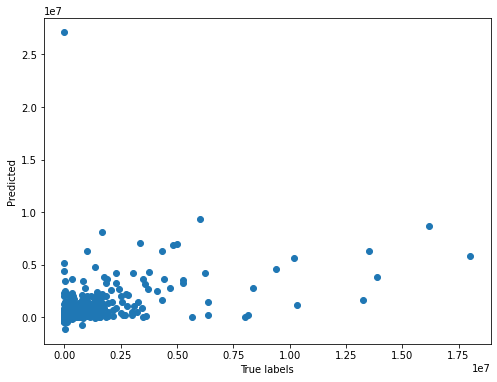

In [250]:
fig, axes = plt.subplots(figsize=(8,6))
axes.scatter(y_test.fillna(0), y_test_pred)
axes.set_xlabel('True labels')
axes.set_ylabel('Predicted')

In [251]:
pd.Series(y_test_pred, index=y_test.index).idxmax()

9888

# Week 3

# Index
- [Capstone Objectives](#Capstone-Objectives)
- [Read in Data](#Read-in-Data)
    - [Merge 2018 and 2019](#Merge-2018-and-2019)
    - [Make advisor dictionary mapper](#Make-advisor-dictionary-mapper)
- [Data Cleaning](#Data-Cleaning)
    - [Custom Cleaning Functions](#Custom-Cleaning-Functions)
    - [Create Cleaning Pipeline](#Create-Cleaning-Pipeline)
- [Model building](#Model-building)
- [Make predictions](#Make-predictions)
- [Model persistance](#Model-persistance)
- [Residuals](#Residuals)
- [Model Interpretation](#Model-Interpretation)

# OBJECTIVES
* Assit sales and marketing by improving their targeting
* Predict sales for 2019 using the data for 2018

In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 50)

[Back to Top](#Index)
# Read in Data

In [253]:
df18 = pd.read_excel("Transaction data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions19")

# Merge 2018 and 2019

In [254]:
df = pd.merge(
    df18,
    df19,
    on='CONTACT_ID',
    suffixes=['_2018', '_2019']
)
print(df.shape)

(10005, 41)


In [255]:
df.head()

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  \
0               0047433               21.0                    38.0   
1               4461312                NaN                     NaN   
2               4491079                NaN                     NaN   
3               0107408               20.0                     NaN   
4  85101140503769936458                NaN                     NaN   

   no_of_sales_12M_10K  no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
0                  NaN                       1.0                     5.0   
1                  NaN                       NaN                     NaN   
2                  NaN                       NaN                     NaN   
3                  2.0                       NaN                     1.0   
4                  NaN                       NaN                     NaN   

   no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
0                         5.0                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       1.0   
4                         NaN                       NaN   

   no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
0                             1.0                          2.0   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          1.0   
4                             NaN                          NaN   

   no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
0                              2.0                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             1.0   
4                              NaN                             NaN   

   no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
0                                  1.0              8.0               1.0   
1                                  NaN              1.0               1.0   
2                                  NaN              NaN               NaN   
3                                  NaN              1.0               1.0   
4                                  NaN              NaN               NaN   

         AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
0  237480.11       250.0         19682.0        -1496.745     -102496.165   
1   19629.00         NaN             NaN              NaN             NaN   
2    1758.70         NaN             NaN              NaN             NaN   
3   57943.00      5459.0         52484.0              NaN             NaN   
4   -8573.59         NaN             NaN              NaN             NaN   

   new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
0                      NaN      -47342.32                 284737.93   
1                      NaN           0.00                  19629.00   
2                      NaN           0.00                   1758.70   
3                      1.0           0.00                      0.00   
4                      NaN       -8573.59                      0.00   

   aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
0                         84.5           0.0              0.0   
1                          0.0           0.0              0.0   
2                          0.0           0.0              0.0   
3                      57943.0           0.0              0.0   
4                          0.0           0.0              0.0   

   aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
0                        0.0                 0.0            0.0        0.0   
1                        0.0                 0.0            0.

# Make advisor dictionary mapper

In [256]:
adviser_lookup = {idx: contact_id for idx, contact_id in enumerate(df['CONTACT_ID'])}

In [257]:
adviser_lookup[123]

'85201142414218755394'

# Data Cleaning

In [258]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'refresh_date_2019', 'refresh_date_2018', 'CONTACT_ID', 
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
    'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
    'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
    'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
    'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
    'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
    'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
    'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'
]

In [259]:
X = df.drop(['sales_12M_2019', 'new_Fund_added_12M_2019'], axis=1)
y = df['sales_12M_2019']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

# Custom Cleaning Functions


In [261]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()


def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    elif isinstance(df, type(pd.DataFrame())):
        num_df = df.select_dtypes(include=['number']).fillna(0)
        non_num_df = df.select_dtypes(exclude=['number'])
        return pd.concat([num_df, non_num_df], axis=1)
    else:
        return np.nan_to_num(df)

[Back to Top](#Index)
## Create Cleaning Pipeline

In [262]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [263]:
extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)

Make pipeline for target variable

In [264]:
targ_pipe = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
#     ('negative_value_trans', negative_value_trans)
])


In [265]:
y_train = targ_pipe.fit_transform(y_train.values.reshape(-1,1)) # fit and transform TRAINING


In [266]:

y_train = pd.Series(y_train.flatten(), index=X_train.index)


In [267]:
y_test = pd.Series(targ_pipe.transform(y_test.values.reshape(-1,1)).flatten(), index=X_test.index) # transform only TESTING

In [268]:
y_test

2052         0.000
2758      5055.190
4334         0.000
9047    100777.230
7001     22500.000
           ...    
5527         0.000
3619         0.000
9819    372569.315
7303         0.000
2840     97081.830
Length: 2502, dtype: float64

Make pipeline for features

In [269]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
])

In [270]:
train_array = feat_pipe.fit(X_train, y_train).transform(X_train)
train_array[:2]

array([[-0.13132686, -0.10041755, -0.21064088, -0.19865712, -0.15343695,
        -0.62678711, -0.43000009, -0.44180383,  0.20146207, -0.86803317,
        -0.53463025, -0.5620389 , -0.37248773,  0.06554336, -0.0889493 ,
        -0.08324658, -0.15460596,  0.09041682,  0.15624596,  0.43684362,
        -0.02649335, -0.07060094, -0.05980054, -0.01245516, -0.02380215,
        -0.04182124, -0.03765524, -0.04000228, -0.07036559, -0.03062799,
        -0.09354653, -0.01848494, -0.0563512 , -0.05793289, -0.01655909,
        -0.07003327],
       [ 0.06459803, -0.06813442, -0.21064088, -0.08744056,  1.9542844 ,
         1.39940146, -0.43000009,  0.29680003,  1.18812652,  1.03436288,
        -0.53463025,  0.77753476,  3.17786794,  1.01858956, -0.12450774,
        -0.08221872, -0.13964123,  0.09041682,  0.07167552,  3.84838427,
         0.05015345, -0.16682196, -0.05980054, -0.01245516, -0.02380215,
        -0.04182124, -0.03765524,  0.04765053,  1.12151599, -0.03062799,
        -0.09354653, -0.01848

Convert the preprocessed numpy array back to pandas dataframe

In [271]:
X_train_prepared = pd.DataFrame(
    train_array,
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [272]:

X_train_prepared.head()

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
4081          -0.131327               -0.100418            -0.210641   
184            0.064598               -0.068134            -0.210641   
186           -0.170512               -0.100418            -0.024389   
230            0.211542               -0.035851            -0.117515   
6327          -0.199901               -0.095806            -0.210641   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
4081                 -0.198657               -0.153437   
184                  -0.087441                1.954284   
186                  -0.198657               -0.153437   
230                  -0.087441               -0.153437   
6327                 -0.198657               -0.574981   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
4081                   -0.626787                 -0.430000   
184                     1.399401                 -0.430000   
186                    -0.626787                  0.320475   
230                     0.183688                  0.320475   
6327                   -0.221549                 -0.430000   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
4081                       -0.441804                     0.201462   
184                         0.296800                     1.188127   
186                        -0.441804                     0.201462   
230                         0.296800                     0.201462   
6327                       -0.441804                    -0.785202   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
4081                        -0.868033                       -0.534630   
184                          1.034363                       -0.534630   
186                         -0.868033                        0.857226   
230                          1.034363                        0.857226   
6327                         0.083165                       -0.534630   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
4081                            -0.562039        -0.372488          0.065543   
184                              0.777535         3.177868          1.018590   
186                             -0.562039        -0.049728          0.065543   
230                              0.777535        -0.049728          0.065543   
6327                            -0.562039        -0.695247         -0.887503   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
4081 -0.088949   -0.083247       -0.154606         0.090417        0.156246   
184  -0.124508   -0.082219       -0.139641         0.090417        0.071676   
186   1.167409   -0.083366        0.354063         0.090417        0.156246   
230  -1.274321   -0.083366       -0.077698         0.090417       -0.110813   
6327 -0.113285   -0.083366       -0.154761         0.090417        0.151123   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
4081                 0.436844      -0.026493                 -0.070601   
184                  3.848384       0.050153                 -0.166822   
186                 -0.416042       3.035922                 -0.081085   
230                 -0.416042       0.007861                 -1.473199   
6327                -0.416042      -0.029084                 -0.097721   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
4081                    -0.059801     -0.012455        -0.023802   
184                     -0.059801     -0.012455        -0.023802   
186                     -0.059801     -0.012455        -0.689998   
230                     -0.059801     -0.012455        -0.023802   
6327                    -0.059801     -0.012455        -0.023802   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
4081                  -0.041821           -0.037655      -0.040002  -0.070366   
184                   -0.

**TRANSFORM** the test set (Do NOT fit the pipeline on testing!)

In [273]:
X_test_prepared = pd.DataFrame(
    feat_pipe.transform(X_test),
    index=X_test.index,
    columns=COLS_TO_KEEP
)

In [274]:
X_test_prepared.head()

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
2052          -0.199901               -0.095806            -0.210641   
2758          -0.160716               -0.049687            -0.210641   
4334          -0.199901               -0.100418            -0.210641   
9047           0.113579                0.051774            -0.210641   
7001           0.005821                0.176295            -0.117515   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
2052                 -0.087441               -0.574981   
2758                 -0.198657               -0.153437   
4334                 -0.198657               -0.574981   
9047                 -0.198657                0.689652   
7001                  0.246209               -0.153437   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
2052                   -0.221549                 -0.430000   
2758                    0.588926                 -0.430000   
4334                   -0.626787                 -0.430000   
9047                    0.588926                 -0.430000   
7001                    1.399401                  0.320475   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
2052                        0.296800                    -0.785202   
2758                       -0.441804                     0.201462   
4334                       -0.441804                    -0.785202   
9047                       -0.441804                     1.188127   
7001                        1.774008                     0.201462   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
2052                         0.083165                       -0.534630   
2758                         1.034363                       -0.534630   
4334                        -0.868033                       -0.534630   
9047                         1.034363                       -0.534630   
7001                         1.034363                        0.857226   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
2052                             0.777535        -0.372488          0.065543   
2758                            -0.562039        -0.695247         -0.887503   
4334                            -0.562039        -0.372488          0.065543   
9047                            -0.562039        -0.049728          0.065543   
7001                             2.117108         0.273031          0.065543   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
2052 -0.262627   -0.083366       -0.154761        -0.569226        0.096033   
2758 -0.103511   -0.081921       -0.153989         0.090417        0.146670   
4334 -0.094480   -0.083366       -0.154761         0.090417        0.156246   
9047 -0.097632   -0.072066       -0.135643         0.090143        0.145206   
7001 -0.099338   -0.083366       -0.078773         0.071092       -0.190393   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
2052                -0.416042      -0.518428                 -0.081085   
2758                -0.416042      -0.036794                 -0.081085   
4334                -0.416042      -0.024506                 -0.081437   
9047                -0.416042      -0.012209                 -0.087769   
7001                -0.416042      -0.035326                 -0.081908   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
2052                    -0.059801     -0.012455        -0.023802   
2758                    -0.067561     -0.012455        -0.023802   
4334                    -0.041550     -0.012455        -0.020072   
9047                    -0.060468     -0.012455        -0.023802   
7001                    -0.038289     -0.012455        -0.023802   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
2052                   6.485925           -0.037655       -0.04036   -0.07523   
2758                  -0.

# Model Building

In [275]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb

Perhaps try:

- Feature and target variable transformations
 - Log transform skewed columns
  - SVD to remove noise and reduce dimensionality

In [276]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
    ('select', SelectFromModel(DecisionTreeRegressor())),
    ('forest', RandomForestRegressor()),
])

In [277]:
feat_pipe.fit(X_train, y_train)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fcd25018940>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fcd25018430>)),
                ('StandardScaler', StandardScaler()),
                ('select', SelectFromModel(estimator=DecisionTreeRegressor())),
                ('forest', RandomForestRegressor())])

[Back to Top](#Index)
# Make predictions

In [278]:
from sklearn.model_selection import cross_validate

In [279]:
cross_validate(feat_pipe, X_train, y_train)

{'fit_time': array([2.16328502, 1.90865397, 2.06942701, 1.16660309, 1.55261731]),
 'score_time': array([0.04421091, 0.04158282, 0.04141593, 0.03321791, 0.03965068]),
 'test_score': array([0.34200776, 0.27068959, 0.24328164, 0.28542589, 0.41786255])}

In [280]:
feat_pipe.named_steps['select'].estimator_.feature_importances_

array([1.65742440e-02, 8.20292298e-03, 1.56460817e-02, 2.15396209e-02,
       1.24804509e-03, 2.12089807e-02, 1.59266914e-03, 1.37062507e-03,
       1.30618504e-03, 3.07527021e-04, 6.26586722e-04, 9.93548775e-03,
       8.54720037e-03, 3.95480247e-04, 8.70944747e-02, 4.80435163e-02,
       2.22238358e-01, 5.95286332e-02, 1.07010511e-02, 8.70132745e-02,
       2.15817401e-02, 8.56226923e-03, 4.21710401e-03, 0.00000000e+00,
       1.12323248e-02, 1.64684583e-02, 7.94817253e-05, 2.08969132e-05,
       2.63026551e-03, 0.00000000e+00, 3.81650237e-03, 6.71222090e-05,
       2.98545587e-01, 7.60245477e-03, 6.67478880e-05, 1.98808060e-03])

In [281]:
#  make regression predictions
y_train_preds = feat_pipe.predict(X_train_prepared)
y_test_preds = feat_pipe.predict(X_test_prepared)

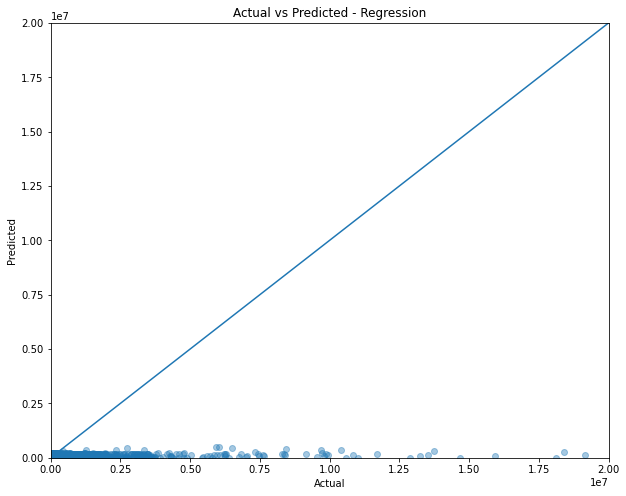

In [282]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(x=y_train, y=y_train_preds, alpha=0.4)
ax.plot([0, 20000000], [0,20000000])
ax.set_xlim([0, 20000000])
ax.set_ylim([0, 20000000])
ax.set_title("Actual vs Predicted - Regression")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted");

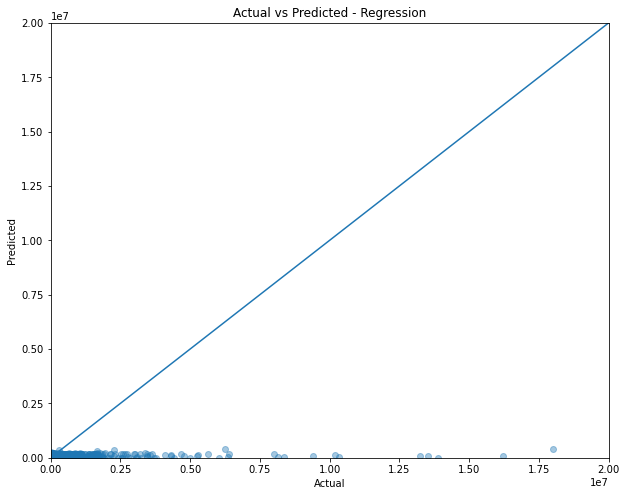

In [283]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(x=y_test, y=y_test_preds, alpha=0.4)
ax.plot([0, 20000000], [0,20000000])
ax.set_xlim([0, 20000000])
ax.set_ylim([0, 20000000])
ax.set_title("Actual vs Predicted - Regression")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted");

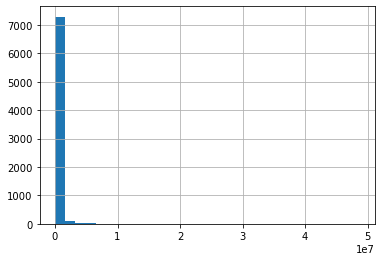

In [284]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
y_train.hist(bins=30, ax=ax);

In [285]:
y_train.describe()

count    7.503000e+03
mean     2.145814e+05
std      1.209152e+06
min     -1.495182e+04
25%      0.000000e+00
50%      1.224400e+02
75%      4.502168e+04
max      4.867638e+07
dtype: float64

Theres a negative value in the target variable. Add a step to the targ_pipe do deal with negative values.`

In [286]:
y_train_log = targ_pipe.transform(np.log(y_train+1))

/Users/serdarteterbas/opt/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


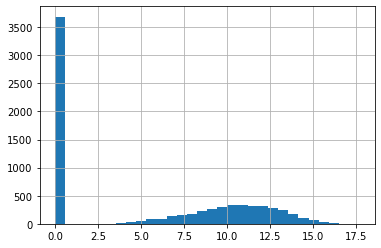

In [287]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
y_train_log.hist(bins=30, ax=ax);

In [288]:
# y_train_logpred = feat_pipe.fit(X_train_prepared, y_train_log)

In [289]:
y_train_log[y_train_log.isnull()]

Series([], dtype: float64)

[Back to Top](#Index)
# Model persistance

In [290]:
feat_pipe

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fcd25018940>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fcd25018430>)),
                ('StandardScaler', StandardScaler()),
                ('select', SelectFromModel(estimator=DecisionTreeRegressor())),
                ('forest', RandomForestRegressor())])

In [291]:
import pickle

In [292]:
ls -la

total 209992
drwxr-xr-x  10 serdarteterbas  staff       320 Nov 25 19:01 ./
drwxr-xr-x   4 serdarteterbas  staff       128 Oct 16 23:27 ../
drwxr-xr-x   3 serdarteterbas  staff        96 Oct 17 15:48 .ipynb_checkpoints/
-rw-r--r--   1 serdarteterbas  staff     10465 Oct 24 15:53 Data Dictionary.xlsx
-rw-r--r--   1 serdarteterbas  staff    675912 Oct 24 15:53 Firm Information.xlsx
-rw-r--r--   1 serdarteterbas  staff     10524 Oct 24 15:53 Lift Chart Template.xlsx
-rw-r--r--@  1 serdarteterbas  staff   1255140 Nov 25 19:01 Nuveen.data.ipynb
-rw-r--r--   1 serdarteterbas  staff   2247407 Oct 24 15:53 Transaction Data.xlsx
-rw-r--r--   1 serdarteterbas  staff  32929698 Nov 25 19:00 first_model.pkl
-rw-r--r--   1 serdarteterbas  staff  69511777 Nov 25 15:47 nuveen_profiling.html


In [293]:
rf2 = RandomForestRegressor()

In [294]:
rf2.fit(X_train_prepared, y_train)

RandomForestRegressor()

In [295]:
with open('first_model.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(rf2, f)

In [296]:
with open('first_model.pkl', 'rb') as f:
    rf_new = pickle.load(f)

In [297]:
rf_new.predict(X_test_prepared)

array([ 82301.93622784,  28369.06475   ,   3425.26345   , ...,
       123636.98194424,   5690.173588  , 222909.88214246])

[Back to Top](#Index)
# Residuals

In [298]:
# get residuals
residuals = y_test_preds - y_test

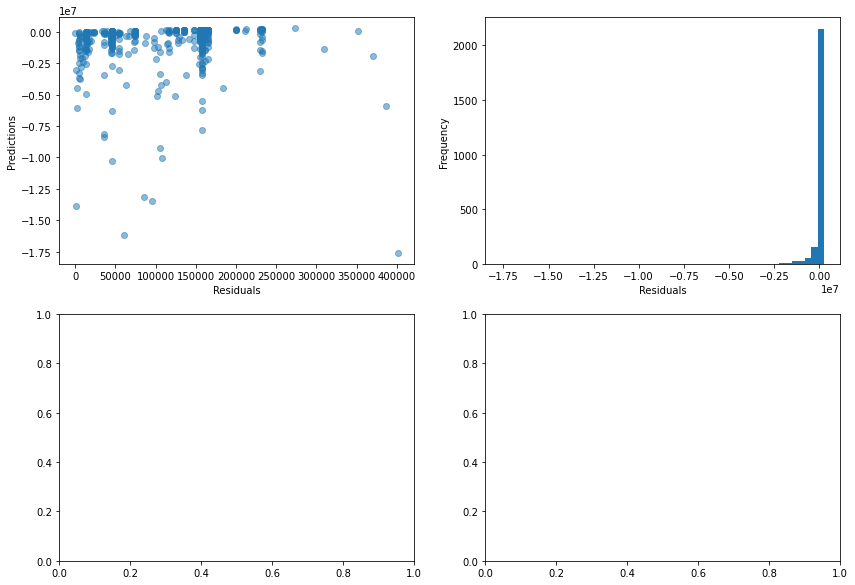

In [299]:
# plot predictions vs residuals
fig, axes = plt.subplots(2,2,figsize=(14,10))

# plot scatter on upper right plot
axes[0,0].scatter(x=y_test_preds, y=residuals, alpha=0.5)
axes[0,0].set(xlabel="Residuals",ylabel="Predictions");

# plot hist on upper left plot
axes[0,1].hist(residuals, bins=50)
axes[0,1].set(xlabel='Residuals', ylabel='Frequency');

In [300]:
from statsmodels.api import qqplot

In [301]:
axes[1,0].set_ylim([-3.5, 3.5])
axes[1,0].set_xlim([-3.5, 3.5])

(-3.5, 3.5)

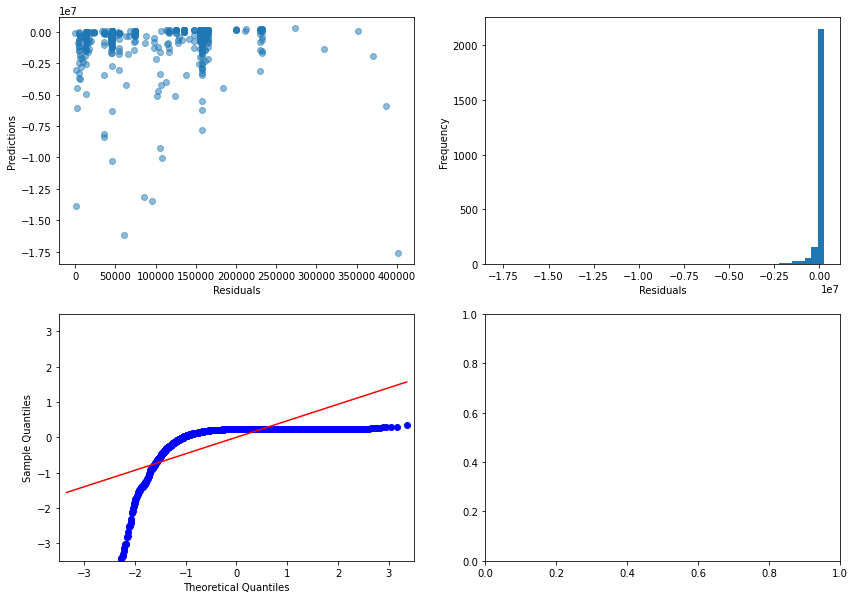

In [302]:
qqplot(residuals, fit=True, line='r', ax=axes[1,0])

[Back to Top](#Index)
# Model Interpretation

# Week 4

# Index
- [Capstone Objectives](#Capstone-Objectives)
- [Read in Data](#Read-in-Data)
    - [Merge 2018 and 2019](#Merge-2018-and-2019)
    - [Make advisor dictionary mapper](#Make-advisor-dictionary-mapper)
- [Data Cleaning](#Data-Cleaning)
    - [Train-Test-Split](#Train-Test-Split)
    - [Custom Cleaning Functions](#Custom-Cleaning-Functions)
    - [Create Cleaning Pipeline](#Create-Cleaning-Pipeline)
- [Model building](#Model-building)
- [Make predictions](#Make-predictions)
- [Feature Engineering](#Feature-Engineering)
    - [Variable Inflation Factor (VIF)](#Variable-Inflation-Factor-(VIF))
- [Residuals](#Residuals)
- [Classification](#Classification)
- [Model Interpretation](#Model-Interpretation)

# Capstone Objectives
- Assist sales and marketing by improving their targeting
- Predict sales for 2019 using the data for 2018
- Estimate the probability of adding a new fund in 2019

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 50)

[Back to Top](#Index)
# Read in Data

In [306]:
df18 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions19")

## Merge 2018 and 2019

In [307]:
df = pd.merge(
    df18, 
    df19, 
    on='CONTACT_ID',
    suffixes=['_2018', '_2019']
)
print(df.shape)

(10005, 41)


In [308]:
df.head()

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  \
0               0047433               21.0                    38.0   
1               4461312                NaN                     NaN   
2               4491079                NaN                     NaN   
3               0107408               20.0                     NaN   
4  85101140503769936458                NaN                     NaN   

   no_of_sales_12M_10K  no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
0                  NaN                       1.0                     5.0   
1                  NaN                       NaN                     NaN   
2                  NaN                       NaN                     NaN   
3                  2.0                       NaN                     1.0   
4                  NaN                       NaN                     NaN   

   no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
0                         5.0                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       1.0   
4                         NaN                       NaN   

   no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
0                             1.0                          2.0   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          1.0   
4                             NaN                          NaN   

   no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
0                              2.0                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             1.0   
4                              NaN                             NaN   

   no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
0                                  1.0              8.0               1.0   
1                                  NaN              1.0               1.0   
2                                  NaN              NaN               NaN   
3                                  NaN              1.0               1.0   
4                                  NaN              NaN               NaN   

         AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
0  237480.11       250.0         19682.0        -1496.745     -102496.165   
1   19629.00         NaN             NaN              NaN             NaN   
2    1758.70         NaN             NaN              NaN             NaN   
3   57943.00      5459.0         52484.0              NaN             NaN   
4   -8573.59         NaN             NaN              NaN             NaN   

   new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
0                      NaN      -47342.32                 284737.93   
1                      NaN           0.00                  19629.00   
2                      NaN           0.00                   1758.70   
3                      1.0           0.00                      0.00   
4                      NaN       -8573.59                      0.00   

   aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
0                         84.5           0.0              0.0   
1                          0.0           0.0              0.0   
2                          0.0           0.0              0.0   
3                      57943.0           0.0              0.0   
4                          0.0           0.0              0.0   

   aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
0                        0.0                 0.0            0.0        0.0   
1                        0.0                 0.0            0.

## Make advisor dictionary mapper

In [309]:
adviser_lookup = {idx: contact_id for idx, contact_id in enumerate(df['CONTACT_ID'])}

In [310]:
adviser_lookup[123]

'85201142414218755394'

[Back to Top](#Index)
# Data Cleaning

In [311]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'refresh_date_2019', 'refresh_date_2018', 'CONTACT_ID', 
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
    'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
    'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
    'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
    'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
    'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
    'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
    'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'
]

In [312]:
X = df.drop(['sales_12M_2019', 'new_Fund_added_12M_2019'], axis=1)
y_reg = df['sales_12M_2019']
y_cl = df['new_Fund_added_12M_2019']

## Train-Test-Split

In [313]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=24
)
y_train_cl, y_test_cl = y_cl[y_train_reg.index], y_cl[y_test_reg.index]

## Custom Cleaning Functions

In [314]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()


def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    elif isinstance(df, type(pd.DataFrame())):
        num_df = df.select_dtypes(include=['number']).fillna(0)
        non_num_df = df.select_dtypes(exclude=['number'])
        return pd.concat([num_df, non_num_df], axis=1)
    else:
        return np.nan_to_num(df)

def negative_to_zero(series):
    '''fill negative values to zero'''
    if isinstance(series, type(pd.Series(dtype='float64'))):
        return series.apply(lambda x: max(0, x))
    else:
        return series

[Back to Top](#Index)
## Create Cleaning Pipeline

In [315]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

In [316]:
extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)
negative_to_zero_trans = FunctionTransformer(negative_to_zero)

Make pipeline for target variable

In [317]:
targ_pipe = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
    ('negative_to_zero', negative_to_zero_trans)
#     ('num_imp', SimpleImputer(strategy='median'))
])

In [318]:
targ_pipe.fit(y_train_reg.to_frame())

Pipeline(steps=[('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fcd25ffdb80>)),
                ('negative_to_zero',
                 FunctionTransformer(func=<function negative_to_zero at 0x7fcd25ffdd30>))])

In [319]:
y_train_reg = targ_pipe.fit_transform(y_train_reg) # fit and transform TRAINING
y_train_cl = targ_pipe.fit_transform(y_train_cl)

In [320]:
y_test_reg = targ_pipe.transform(y_test_reg) # transform only TESTING
y_test_cl = targ_pipe.transform(y_test_cl) # transform only TESTING

Make pipeline for features

In [321]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
])

In [322]:
train_array = feat_pipe.fit(X_train, y_train_reg).transform(X_train)
train_array[:2]

array([[-0.13132686, -0.10041755, -0.21064088, -0.19865712, -0.15343695,
        -0.62678711, -0.43000009, -0.44180383,  0.20146207, -0.86803317,
        -0.53463025, -0.5620389 , -0.37248773,  0.06554336, -0.0889493 ,
        -0.08324658, -0.15460596,  0.09041682,  0.15624596,  0.43684362,
        -0.02649335, -0.07060094, -0.05980054, -0.01245516, -0.02380215,
        -0.04182124, -0.03765524, -0.04000228, -0.07036559, -0.03062799,
        -0.09354653, -0.01848494, -0.0563512 , -0.05793289, -0.01655909,
        -0.07003327],
       [ 0.06459803, -0.06813442, -0.21064088, -0.08744056,  1.9542844 ,
         1.39940146, -0.43000009,  0.29680003,  1.18812652,  1.03436288,
        -0.53463025,  0.77753476,  3.17786794,  1.01858956, -0.12450774,
        -0.08221872, -0.13964123,  0.09041682,  0.07167552,  3.84838427,
         0.05015345, -0.16682196, -0.05980054, -0.01245516, -0.02380215,
        -0.04182124, -0.03765524,  0.04765053,  1.12151599, -0.03062799,
        -0.09354653, -0.01848

Convert the preprocessed numpy array back to pandas dataframe

In [323]:
X_train_prepared = pd.DataFrame(
    train_array,
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [324]:
X_train_prepared.head()

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
4081          -0.131327               -0.100418            -0.210641   
184            0.064598               -0.068134            -0.210641   
186           -0.170512               -0.100418            -0.024389   
230            0.211542               -0.035851            -0.117515   
6327          -0.199901               -0.095806            -0.210641   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
4081                 -0.198657               -0.153437   
184                  -0.087441                1.954284   
186                  -0.198657               -0.153437   
230                  -0.087441               -0.153437   
6327                 -0.198657               -0.574981   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
4081                   -0.626787                 -0.430000   
184                     1.399401                 -0.430000   
186                    -0.626787                  0.320475   
230                     0.183688                  0.320475   
6327                   -0.221549                 -0.430000   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
4081                       -0.441804                     0.201462   
184                         0.296800                     1.188127   
186                        -0.441804                     0.201462   
230                         0.296800                     0.201462   
6327                       -0.441804                    -0.785202   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
4081                        -0.868033                       -0.534630   
184                          1.034363                       -0.534630   
186                         -0.868033                        0.857226   
230                          1.034363                        0.857226   
6327                         0.083165                       -0.534630   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
4081                            -0.562039        -0.372488          0.065543   
184                              0.777535         3.177868          1.018590   
186                             -0.562039        -0.049728          0.065543   
230                              0.777535        -0.049728          0.065543   
6327                            -0.562039        -0.695247         -0.887503   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
4081 -0.088949   -0.083247       -0.154606         0.090417        0.156246   
184  -0.124508   -0.082219       -0.139641         0.090417        0.071676   
186   1.167409   -0.083366        0.354063         0.090417        0.156246   
230  -1.274321   -0.083366       -0.077698         0.090417       -0.110813   
6327 -0.113285   -0.083366       -0.154761         0.090417        0.151123   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
4081                 0.436844      -0.026493                 -0.070601   
184                  3.848384       0.050153                 -0.166822   
186                 -0.416042       3.035922                 -0.081085   
230                 -0.416042       0.007861                 -1.473199   
6327                -0.416042      -0.029084                 -0.097721   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
4081                    -0.059801     -0.012455        -0.023802   
184                     -0.059801     -0.012455        -0.023802   
186                     -0.059801     -0.012455        -0.689998   
230                     -0.059801     -0.012455        -0.023802   
6327                    -0.059801     -0.012455        -0.023802   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
4081                  -0.041821           -0.037655      -0.040002  -0.070366   
184                   -0.

**TRANSFORM** the test set (Do NOT fit the pipeline on testing!)

In [325]:
X_test_prepared = pd.DataFrame(
    feat_pipe.transform(X_test),
    index=X_test.index,
    columns=COLS_TO_KEEP
)

In [326]:
X_test_prepared.head()

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
2052          -0.199901               -0.095806            -0.210641   
2758          -0.160716               -0.049687            -0.210641   
4334          -0.199901               -0.100418            -0.210641   
9047           0.113579                0.051774            -0.210641   
7001           0.005821                0.176295            -0.117515   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
2052                 -0.087441               -0.574981   
2758                 -0.198657               -0.153437   
4334                 -0.198657               -0.574981   
9047                 -0.198657                0.689652   
7001                  0.246209               -0.153437   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
2052                   -0.221549                 -0.430000   
2758                    0.588926                 -0.430000   
4334                   -0.626787                 -0.430000   
9047                    0.588926                 -0.430000   
7001                    1.399401                  0.320475   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
2052                        0.296800                    -0.785202   
2758                       -0.441804                     0.201462   
4334                       -0.441804                    -0.785202   
9047                       -0.441804                     1.188127   
7001                        1.774008                     0.201462   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
2052                         0.083165                       -0.534630   
2758                         1.034363                       -0.534630   
4334                        -0.868033                       -0.534630   
9047                         1.034363                       -0.534630   
7001                         1.034363                        0.857226   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
2052                             0.777535        -0.372488          0.065543   
2758                            -0.562039        -0.695247         -0.887503   
4334                            -0.562039        -0.372488          0.065543   
9047                            -0.562039        -0.049728          0.065543   
7001                             2.117108         0.273031          0.065543   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
2052 -0.262627   -0.083366       -0.154761        -0.569226        0.096033   
2758 -0.103511   -0.081921       -0.153989         0.090417        0.146670   
4334 -0.094480   -0.083366       -0.154761         0.090417        0.156246   
9047 -0.097632   -0.072066       -0.135643         0.090143        0.145206   
7001 -0.099338   -0.083366       -0.078773         0.071092       -0.190393   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
2052                -0.416042      -0.518428                 -0.081085   
2758                -0.416042      -0.036794                 -0.081085   
4334                -0.416042      -0.024506                 -0.081437   
9047                -0.416042      -0.012209                 -0.087769   
7001                -0.416042      -0.035326                 -0.081908   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
2052                    -0.059801     -0.012455        -0.023802   
2758                    -0.067561     -0.012455        -0.023802   
4334                    -0.041550     -0.012455        -0.020072   
9047                    -0.060468     -0.012455        -0.023802   
7001                    -0.038289     -0.012455        -0.023802   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
2052                   6.485925           -0.037655       -0.04036   -0.07523   
2758                  -0.

[Back to Top](#Index)
# Model building

In [327]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA, TruncatedSVD
import xgboost as xgb

In [328]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
    ('SVD', TruncatedSVD(n_components=3)),
#     ('select', SelectFromModel(DecisionTreeRegressor())),
    ('xgbr', xgb.XGBRegressor()),
])

In [329]:
[col for col in X_train.columns if '10K' in col]

['no_of_sales_12M_10K',
 'no_of_Redemption_12M_10K',
 'no_of_fund_sales_12M_10K',
 'no_of_funds_Redemption_12M_10K',
 'no_of_assetclass_sales_12M_10K',
 'no_of_assetclass_Redemption_12M_10K']

In [330]:
new_X_train = X_train[[col for col in X_train.columns if '10K' in col]]

In [331]:
feat_pipe.fit(new_X_train, y_train_reg)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fcd25ffdee0>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fcd25ffdb80>)),
                ('StandardScaler', StandardScaler()),
                ('SVD', TruncatedSVD(n_components=3)),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, cols...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0

[Back to Top](#Index)
# Make predictions

In [332]:
test_preds = feat_pipe.predict(X_test_prepared[[col for col in X_train.columns if '10K' in col]])
test_preds

array([ 18099.111 ,   1038.1887,   1038.1887, ..., 301786.97  ,
        18099.111 , 230463.88  ], dtype=float32)

In [333]:
from sklearn.model_selection import cross_validate

In [334]:
-cross_validate(feat_pipe, X_train_prepared, y_train_reg, scoring='neg_root_mean_squared_error')['test_score']

array([ 959518.46911598,  777251.63766852, 1129949.41815346,
        969120.35703637,  985674.03032865])

In [335]:
def evaluate_model(model, X, y):
    print("Cross Validation Scores:")
    print(cross_validate(model, X, y, scoring='neg_root_mean_squared_error')['test_score'])
    print('-'*55)
    preds = np.exp(model.predict(X))
    lim = max(preds.max(), y.max())
    fig, ax = plt.subplots(1,1,figsize=(7,5))
    ax.scatter(x=y, y=preds, alpha=0.4)
    ax.plot([0, 10000], [0, 10000])
    ax.set_xlim([0, 10000])
    ax.set_ylim([0, 10000])
    ax.set_title("Actual vs Predicted - Regression")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted");

In [336]:
y_train_reg_log = np.log(y_train_reg+1)
y_test_reg_log = np.log(y_test_reg+1)

In [337]:
feat_pipe.fit(X_train_prepared, y_train_reg_log)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fcd25ffdee0>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fcd25ffdb80>)),
                ('StandardScaler', StandardScaler()),
                ('SVD', TruncatedSVD(n_components=3)),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, cols...
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0

In [338]:
feat_pipe.predict(X_test_prepared)[0]

4.603219

In [339]:
np.exp(1.5966611)

4.936522322561038

Cross Validation Scores:
[-4.15831152 -4.34323457 -4.31317128 -4.29764506 -4.22554057]
-------------------------------------------------------


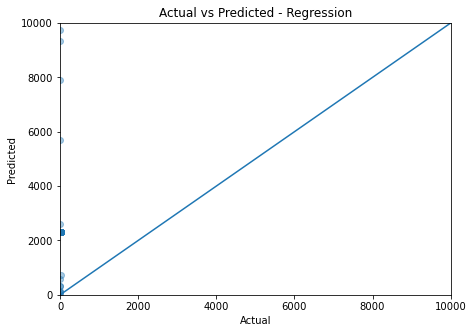

In [340]:
evaluate_model(feat_pipe, X_train, y_train_reg_log)

Cross Validation Scores:
[-4.44174366 -4.3534345  -4.43582863 -4.56431377 -4.54676095]
-------------------------------------------------------


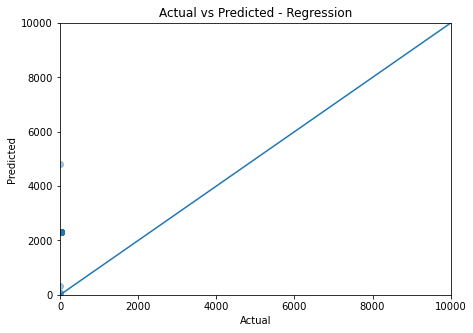

In [341]:
evaluate_model(feat_pipe, X_test, y_test_reg_log)

[Back to Top](#Index)
# Feature Engineering

**What is feature engineering**?

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." - Andrew Ng

Feature engineering is the term broadly applied to the creation and manipulation of features (variables) used in machine learning algorithms. Unless we're working with the same data over and over again, this isn't something we can automate. It will require creativity and a good, thorough understanding of our data.

Regression results can change significantly depending on feature selection. Let's take a closer look at our features.

In [342]:
X_train_prepared.corr().style.background_gradient().set_precision(2)

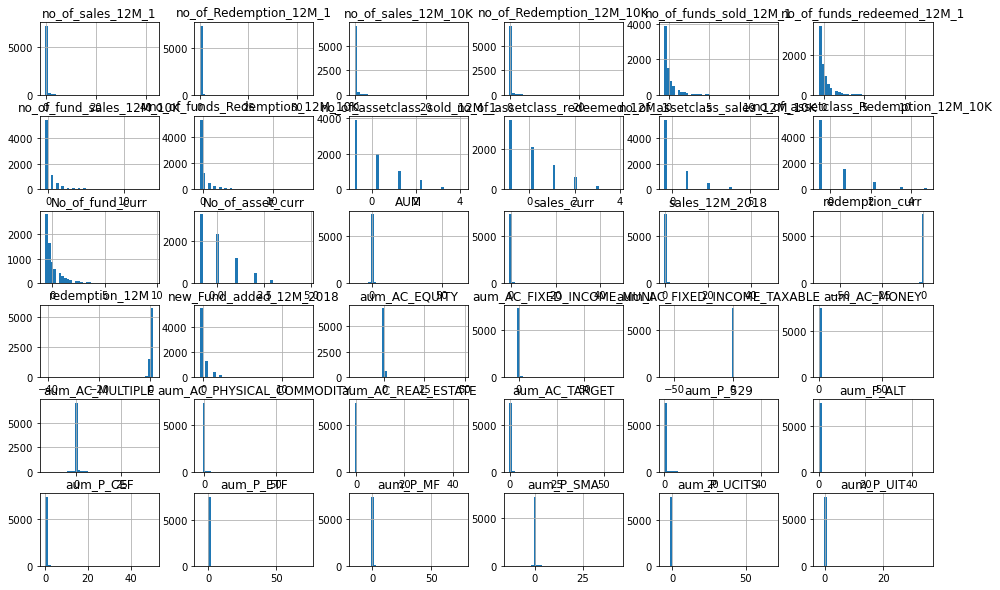

In [343]:
X_train_prepared.hist(bins=40, figsize=(16,10));

[Back to Top](#Index)
## Variable Inflation Factor (VIF)

VIF measures the amount of multicollinearity in a set of multiple regressors, by evaluating how much the variance of the independent variable is inflated by it's interaction with other independent variables. VIF threshold of 5 to 10 are acceptable, but values above 10 are too high.  

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=10.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [345]:
funds = pd.concat([X_train_prepared, y_train_reg.to_frame()], axis=1)
features = funds.columns.tolist()
target = 'sales_12M_2019'

In [346]:
transformer = ReduceVIF()

X_tr_vif = transformer.fit_transform(X_train_prepared, y_train_reg)
X_tr_vif.head()

ReduceVIF fit
ReduceVIF transform


/Users/serdarteterbas/opt/miniconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping AUM with vif=inf
Dropping aum_AC_EQUITY with vif=inf
Dropping aum_AC_REAL_ESTATE with vif=12.883861985080268
Dropping no_of_funds_sold_12M_1 with vif=11.388600650383239
Dropping aum_P_MF with vif=10.507825557145479


no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
0          -0.131327               -0.100418            -0.210641   
1           0.064598               -0.068134            -0.210641   
2          -0.170512               -0.100418            -0.024389   
3           0.211542               -0.035851            -0.117515   
4          -0.199901               -0.095806            -0.210641   

   no_of_Redemption_12M_10K  no_of_funds_redeemed_12M_1  \
0                 -0.198657                   -0.626787   
1                 -0.087441                    1.399401   
2                 -0.198657                   -0.626787   
3                 -0.087441                    0.183688   
4                 -0.198657                   -0.221549   

   no_of_fund_sales_12M_10K  no_of_funds_Redemption_12M_10K  \
0                 -0.430000                       -0.441804   
1                 -0.430000                        0.296800   
2                  0.320475                       -0.441804   
3                  0.320475                        0.296800   
4                 -0.430000                       -0.441804   

   no_of_assetclass_sold_12M_1  no_of_assetclass_redeemed_12M_1  \
0                     0.201462                        -0.868033   
1                     1.188127                         1.034363   
2                     0.201462                        -0.868033   
3                     0.201462                         1.034363   
4                    -0.785202                         0.083165   

   no_of_assetclass_sales_12M_10K  no_of_assetclass_Redemption_12M_10K  \
0                       -0.534630                            -0.562039   
1                       -0.534630                             0.777535   
2                        0.857226                            -0.562039   
3                        0.857226                             0.777535   
4                       -0.534630                            -0.562039   

   No_of_fund_curr  No_of_asset_curr  sales_curr  sales_12M_2018  \
0        -0.372488          0.065543   -0.083247       -0.154606   
1         3.177868          1.018590   -0.082219       -0.139641   
2        -0.049728          0.065543   -0.083366        0.354063   
3        -0.049728          0.065543   -0.083366       -0.077698   
4        -0.695247         -0.887503   -0.083366       -0.154761   

   redemption_curr  redemption_12M  new_Fund_added_12M_2018  \
0         0.090417        0.156246                 0.436844   
1         0.090417        0.071676                 3.848384   
2         0.090417        0.156246                -0.416042   
3         0.090417       -0.110813                -0.416042   
4         0.090417        0.151123                -0.416042   

   aum_AC_FIXED_INCOME_MUNI  aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  \
0                 -0.070601                    -0.059801     -0.012455   
1                 -0.166822                    -0.059801     -0.012455   
2                 -0.081085                    -0.059801     -0.012455   
3                 -1.473199                    -0.059801     -0.012455   
4                 -0.097721                    -0.059801     -0.012455   

   aum_AC_MULTIPLE  aum_AC_PHYSICAL_COMMODITY  aum_AC_TARGET  aum_P_529  \
0        -0.023802                  -0.041821      -0.040002  -0.070366   
1        -0.023802                  -0.041821       0.047651   1.121516   
2        -0.689998                  -0.041821      -0.040360  -0.075230   
3        -0.023802                  -0.311608      -0.040360  -0.075230   
4        -0.023802                  -0.041821      -0.040360  -0.075230   

   aum_P_ALT  aum_P_CEF  aum_P_ETF  aum_P_SMA  aum_P_UCITS  aum_P_UIT  
0  -0.030628  -0.093547  -0.018485  -0.057933    -0.016559  -0.070033  
1  -0.030628  -0.093547  -0.018485  -0.158246    -0.016559   3.269629  
2  -0.030628  -0.093547  -0.018485   2.378954    -0.016559  -0.070033  
3  -0.030628  -0.093547  -0.018485

[Back to Top](#Index)
# Residuals

In [347]:
y_test_preds = feat_pipe.predict(X_test_prepared)

In [348]:
# get residuals
residuals = y_test_preds - y_test_reg

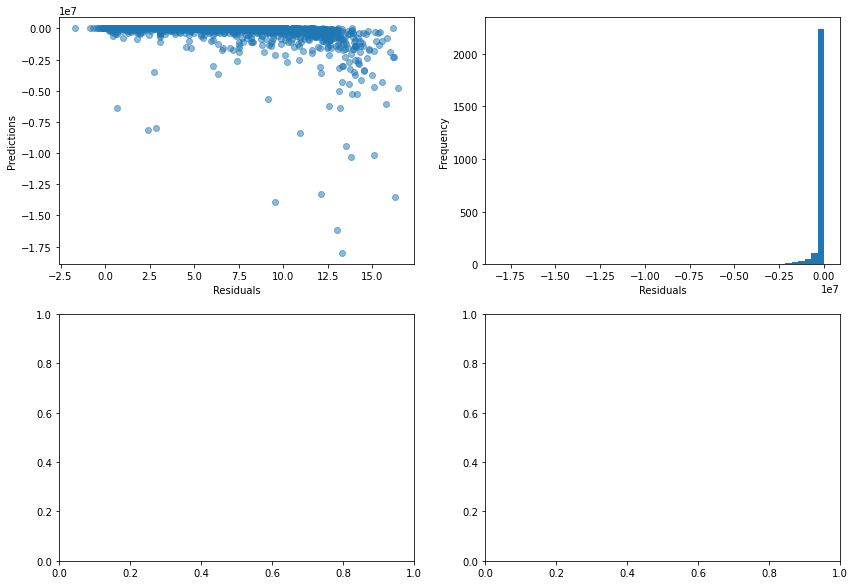

In [349]:
# plot predictions vs residuals
fig, axes = plt.subplots(2,2,figsize=(14,10))

# plot scatter on upper right plot
axes[0,0].scatter(x=y_test_preds, y=residuals, alpha=0.5)
axes[0,0].set(xlabel="Residuals",ylabel="Predictions");

# plot hist on upper left plot
axes[0,1].hist(residuals, bins=50)
axes[0,1].set(xlabel='Residuals', ylabel='Frequency');

In [350]:
from statsmodels.api import qqplot

In [351]:
axes[1,0].set_ylim([-3.5, 3.5])
axes[1,0].set_xlim([-3.5, 3.5])

(-3.5, 3.5)

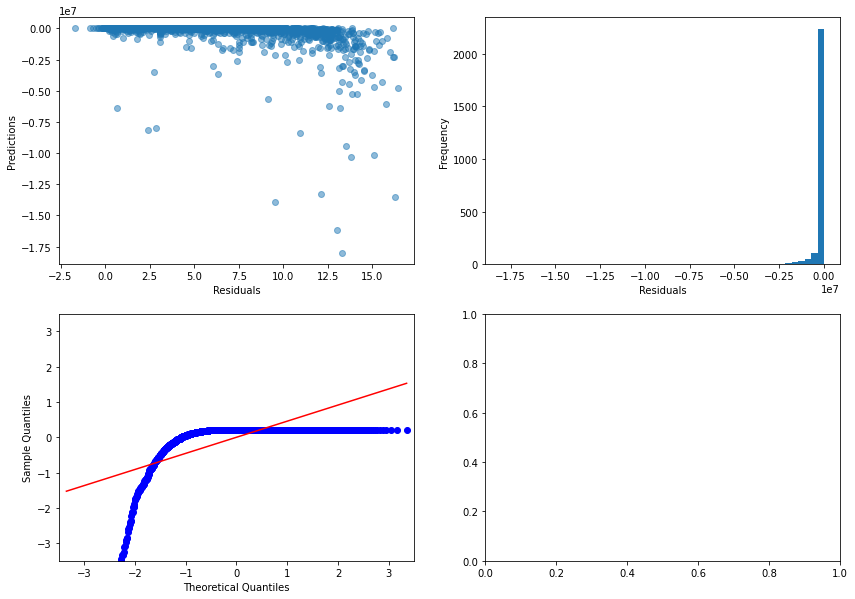

In [352]:
qqplot(residuals, fit=True, line='r', ax=axes[1,0])

# Capstone Week 5
---

# Index
- [Capstone Objectives](#Capstone-Objectives)
- [Read in Data](#Read-in-Data)
    - [Merge 2018 and 2019](#Merge-2018-and-2019)
    - [Make advisor dictionary mapper](#Make-advisor-dictionary-mapper)
- [Pandas Profiling](#Pandas-Profiling)
- [Missing Data](#Missing-Data)
    - [How big of a problem is missing data?](#How-big-of-a-problem-is-missing-data?)
    - [Three types of missing data](#Three-types-of-missing-data)
    - [Strategies for handling missing data](#Strategies-for-handling-missing-data)
        - [Weight Class Adjustment Example](#Weight-Class-Adjustment-Example)
    - [Imputation Strategies](#Imputation-Strategies)
    - [Missingness Tests](#Missingness-Tests)
    - [MCAR Data](#MCAR-Data)
    - [MAR Data](#MAR-Data)
    - [NMAR Data](#NMAR-Data)
    - [Missing data workflow](#Missing-data-workflow)
- [Data Cleaning](#Data-Cleaning)
    - [Train-Test-Split](#Train-Test-Split)
    - [Custom Cleaning Functions](#Custom-Cleaning-Functions)
    - [Create Cleaning Pipeline](#Create-Cleaning-Pipeline)
- [Model building](#Model-building)
- [Make predictions](#Make-predictions)
- [Feature Engineering](#Feature-Engineering)
    - [Variable Inflation Factor (VIF)](#Variable-Inflation-Factor-(VIF))
- [Residuals](#Residuals)
- [Classification](#Classification)
- [Model Interpretation](#Model-Interpretation)

# Capstone Objectives
- Assist sales and marketing by improving their targeting
- Predict sales for 2019 using the data for 2018
- Estimate the probability of adding a new fund in 2019

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 50)

[Back to Top](#Index)
# Read in Data

In [431]:
df18 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions19")

## Merge 2018 and 2019

In [432]:
df = pd.merge(
    df18, 
    df19, 
    on='CONTACT_ID',
    suffixes=['_2018', '_2019']
)
print(df.shape)

(10005, 41)


In [433]:
df.head()

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  \
0               0047433               21.0                    38.0   
1               4461312                NaN                     NaN   
2               4491079                NaN                     NaN   
3               0107408               20.0                     NaN   
4  85101140503769936458                NaN                     NaN   

   no_of_sales_12M_10K  no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
0                  NaN                       1.0                     5.0   
1                  NaN                       NaN                     NaN   
2                  NaN                       NaN                     NaN   
3                  2.0                       NaN                     1.0   
4                  NaN                       NaN                     NaN   

   no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
0                         5.0                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       1.0   
4                         NaN                       NaN   

   no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
0                             1.0                          2.0   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          1.0   
4                             NaN                          NaN   

   no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
0                              2.0                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             1.0   
4                              NaN                             NaN   

   no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
0                                  1.0              8.0               1.0   
1                                  NaN              1.0               1.0   
2                                  NaN              NaN               NaN   
3                                  NaN              1.0               1.0   
4                                  NaN              NaN               NaN   

         AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
0  237480.11       250.0         19682.0        -1496.745     -102496.165   
1   19629.00         NaN             NaN              NaN             NaN   
2    1758.70         NaN             NaN              NaN             NaN   
3   57943.00      5459.0         52484.0              NaN             NaN   
4   -8573.59         NaN             NaN              NaN             NaN   

   new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
0                      NaN      -47342.32                 284737.93   
1                      NaN           0.00                  19629.00   
2                      NaN           0.00                   1758.70   
3                      1.0           0.00                      0.00   
4                      NaN       -8573.59                      0.00   

   aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
0                         84.5           0.0              0.0   
1                          0.0           0.0              0.0   
2                          0.0           0.0              0.0   
3                      57943.0           0.0              0.0   
4                          0.0           0.0              0.0   

   aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
0                        0.0                 0.0            0.0        0.0   
1                        0.0                 0.0            0.

## Make advisor dictionary mapper

In [434]:
adviser_lookup = {idx: contact_id for idx, contact_id in enumerate(df['CONTACT_ID'])}

In [435]:
adviser_lookup[123]

'85201142414218755394'

[Back to Top](#Index)
# Pandas Profiling

In [436]:
# !conda install -yc conda-forge pandas-profiling

In [437]:
from pandas_profiling import ProfileReport

In [438]:
# missing_diagrams = {
#     'heatmap': True, 'dendrogram': True, 'matrix': True, 'bar': True
# }

In [439]:
profile = ProfileReport(df, title='Nuveen Profile Report')

In [440]:
# profile.to_widgets()

In [441]:
profile.to_file(output_file="nuveen_profiling.html")

[Back to Top](#Index)
# Missing Data

Up to this point we haven't put much thought into dealing with missing data. Missing data is EVERYWHERE and it's important to know how to do data science with missing data. It can significantly undermine our results!

## How big of a problem is missing data?

This is difficult question because we only see what we observe. We can use simulated data to help answer this question, but we cannot quantify the impact of missing data in our real data projects.

See this resource: https://github.com/matthewbrems/jupytercon-missing-data-2018

## Three types of missing data

1. **MCAR**: Missing Completely at Random
    - Some intern spills their coffee on your surveys in random order
    - Flip coin of missingness
    
    
2. **MAR**: Missing at Random
    - I adminster a survey about income. Those who aare female are less likely to respond to the question about income.
    - Missing data is conditional on data have observed.


3. **NMAR**: Not Missing at Random (Worst type!)
    - I adminster a survey that includes a question about income. Those who have lower incomes are less likely to respond to the question about income.
    - Data of interest are systematically different for respondents and nonrespondents
    - Whether the data are missing or not depends on the value of the unobserved value itself!
    


[Back to Top](#Index)
## Strategies for handling missing data
1. **Avoid it** (best option, if possible)
    - Use sound design when collecting data
    - Improve survey questioning and design
    - Drop all rows with _any_ missing value
    
    
2. **Ignore it** (second best option, if possible): 
    - Assume your respondents are close enough to the sample of non-respondents
    - Drop any observation with _any_ missing value
    
    
3. **Account for it** (most common):
    - Weight class adjustments
    - Determine why data are missing
    - Employ a strategy for accounting for missing data

[Back to Top](#Index)
### Weight Class Adjustment Example

I'm estimating job satisfaction among two departments: finance and accounting. Both departments are the same size (A: 50%, F: 50%).

$$W_{finance} = \frac{true\;proportion}{proportion\;of\;responses} = \frac{0.50}{0.25} = 2$$
<br>
$$W_{accounting} = \frac{true\;proportion}{proportion\;of\;responses} = \frac{0.50}{0.75} = \frac{2}{3}$$

[Back to Top](#Index)
## Imputation Strategies

1. Deductive Imputation: use logical relationships to fill in value **VALID**

    - Respondent says the were not victim of crime, but left "victim of a violent crime" question blank.
    - If someone has 2 children in year 1, `NaN` children in year 2, and 2 children in year 3, we can _probably_ impute that in year 2 they still had 2 children.
    - PRO: Valid method, requires minimal "inference"
    - CON: Time consuming and requires specific coding


2. Mean/Median/Mode: use measure central tendency to fill value **INVALID**

     - PRO: Easy to implement
     - CON: Significantly distorts histogram (underestimates variance) and results will look more precise than they really are
     

3. Regression Imputation: replace missing based on predicted value from regression line **INVALID**

    - PRO: Easy to understand
    - CON: Distorts distribution and underestimates variance still because there is no randomness in the prediction
    
    
4. Stochastic Regression Imputation:

    - Replace missing with predicted value from regression line plus random draw from normal distribution `N(0, s)`, where `s` is estimataed from model residuals **INVALID**
    
    - PRO: Easy to understand and better than just regression technique
    - CON: Still under estimate variance because selecting single point from normal distribution of error
    
    
5. Multiply Stochastic Regression Imputation: pull multiple values from distribution. Replace missing with predicted value from line with random error.

    - PRO: Better than number 4
    - CON: All `Beta` coefficients are constant, so still not credible
    
    
6. Proper Multiply Stochastic Regression Imputation: Called Multiple Imputation by Chained Equations [(MICE)](https://stats.stackexchange.com/questions/421545/multiple-imputation-by-chained-equations-mice-explained)

    - Create `n` copies of your data set (let's say, 10)
    - For each dataset:
        - Generate coefficients for your regression model
            - For each missing value:
                - Replace `NaN` with a value predicted from a regression
            - Do your "final analysis" or generate your final prediction
    - Aggregate your analysis/predictions across all data sets so you have one complete analysis
    - These predictions were created by properly estimating the variance in your data
    - PRO: Very good method, **VALID**
    - CON: Takes more effort to implement (`fancyimpute` or `mice` in R)

[Back to Top](#Index)
## Missingness Tests

1. Little's Test for MCAR
    - $H_0 : MCAR$
    - $H_A : MAR$
    - There is no test for NMAR!
2. Split your data into "observed" and "unobserved" and compare them
    - Split missing `income` and observed `income` sets. Do the other variables have the same distributions?
3. Think about missing data process. Can you come up with a reasonable answer based on how missing data came about?

[Back to Top](#Index)
## MCAR Data

Use any of the methods we previously discussed:
- Deductive imputation
- Proper imputation
- Stochastic Regression Imputation
- Complete-Case Removal (unbiased, but variance will be higher because our sample size is smaller!)

## MAR Data

Use one of the following methods:
- Deductive imputation
- Proper imputation
- Stochastic Regression Imputation

## NMAR Data

Use one of the following methods:
- Deductive imputation
- Advanced methods: selection models and pattern mixture models

[Back to Top](#Index)
## Missing data workflow
1. How much missing data do I have?
2. For each variable, estimate the type of missing data
3. What is the best method for handling missing values?

[Back to Top](#Index)
# Data Cleaning

In [488]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'refresh_date_2019', 'refresh_date_2018', 'CONTACT_ID', 
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
    'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
    'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
    'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
    'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
    'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
    'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
    'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'
]

In [489]:
X = df.drop(['sales_12M_2019', 'new_Fund_added_12M_2019'], axis=1)
y_reg = df['sales_12M_2019']
y_cl = bin_y_class(df['new_Fund_added_12M_2019'])

In [490]:
y_cl.value_counts()

0    7484
1    2521
Name: new_Fund_added_12M_2019, dtype: int64

In [491]:
def bin_y_class(series):
    series = series.apply(lambda x: 1 if x >=1 else 0)
    return series

In [492]:
y_cl.value_counts()

0    7484
1    2521
Name: new_Fund_added_12M_2019, dtype: int64

## Train-Test-Split

In [493]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=24
)
y_train_cl, y_test_cl = y_cl[y_train_reg.index], y_cl[y_test_reg.index]

## Custom Cleaning Functions

In [494]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()


def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    elif isinstance(df, type(pd.DataFrame())):
        num_df = df.select_dtypes(include=['number']).fillna(0)
        non_num_df = df.select_dtypes(exclude=['number'])
        return pd.concat([num_df, non_num_df], axis=1)
    else:
        return np.nan_to_num(df)

def negative_to_zero(series):
    '''fill negative values to zero'''
    if isinstance(series, type(pd.Series(dtype='float64'))):
        return series.apply(lambda x: max(0, x))
    else:
        return series

[Back to Top](#Index)
## Create Cleaning Pipeline

In [495]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

Transformers

In [496]:
extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)
negative_to_zero_trans = FunctionTransformer(negative_to_zero)

Make pipeline for target variable

In [497]:
targ_pipe = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
    ('negative_to_zero', negative_to_zero_trans)
#     ('num_imp', SimpleImputer(strategy='median'))
])

targ_pipe.fit(y_train_reg.to_frame())

y_train_reg = targ_pipe.fit_transform(y_train_reg) # fit and transform TRAINING
y_train_cl = targ_pipe.fit_transform(y_train_cl)

y_test_reg = targ_pipe.transform(y_test_reg) # transform only TESTING
y_test_cl = targ_pipe.transform(y_test_cl) # transform only TESTING

Make pipeline for features

In [498]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
])

train_array = feat_pipe.fit(X_train, y_train_reg).transform(X_train)

X_train_prepared = pd.DataFrame(
    train_array,
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [499]:
X_train_prepared.head(2)

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
4081          -0.131327               -0.100418            -0.210641   
184            0.064598               -0.068134            -0.210641   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
4081                 -0.198657               -0.153437   
184                  -0.087441                1.954284   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
4081                   -0.626787                     -0.43   
184                     1.399401                     -0.43   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
4081                       -0.441804                     0.201462   
184                         0.296800                     1.188127   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
4081                        -0.868033                        -0.53463   
184                          1.034363                        -0.53463   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
4081                            -0.562039        -0.372488          0.065543   
184                              0.777535         3.177868          1.018590   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
4081 -0.088949   -0.083247       -0.154606         0.090417        0.156246   
184  -0.124508   -0.082219       -0.139641         0.090417        0.071676   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
4081                 0.436844      -0.026493                 -0.070601   
184                  3.848384       0.050153                 -0.166822   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
4081                    -0.059801     -0.012455        -0.023802   
184                     -0.059801     -0.012455        -0.023802   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
4081                  -0.041821           -0.037655      -0.040002  -0.070366   
184                   -0.041821           -0.037655       0.047651   1.121516   

      aum_P_ALT  aum_P_CEF  aum_P_ETF  aum_P_MF  aum_P_SMA  aum_P_UCITS  \
4081  -0.030628  -0.093547  -0.018485 -0.056351  -0.057933    -0.016559   
184   -0.030628  -0.093547  -0.018485 -0.160696  -0.158246    -0.016559   

      aum_P_UIT  
4081  -0.070033  
184    3.269629

**TRANSFORM** the test set (Do NOT fit the pipeline on testing!)

In [500]:
X_test_prepared = pd.DataFrame(
    feat_pipe.transform(X_test),
    index=X_test.index,
    columns=COLS_TO_KEEP
)

In [501]:
X_test_prepared.head(2)

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
2052          -0.199901               -0.095806            -0.210641   
2758          -0.160716               -0.049687            -0.210641   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
2052                 -0.087441               -0.574981   
2758                 -0.198657               -0.153437   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
2052                   -0.221549                     -0.43   
2758                    0.588926                     -0.43   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
2052                        0.296800                    -0.785202   
2758                       -0.441804                     0.201462   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
2052                         0.083165                        -0.53463   
2758                         1.034363                        -0.53463   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
2052                             0.777535        -0.372488          0.065543   
2758                            -0.562039        -0.695247         -0.887503   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
2052 -0.262627   -0.083366       -0.154761        -0.569226        0.096033   
2758 -0.103511   -0.081921       -0.153989         0.090417        0.146670   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
2052                -0.416042      -0.518428                 -0.081085   
2758                -0.416042      -0.036794                 -0.081085   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
2052                    -0.059801     -0.012455        -0.023802   
2758                    -0.067561     -0.012455        -0.023802   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
2052                   6.485925           -0.037655       -0.04036   -0.07523   
2758                  -0.041821           -0.037655       -0.04036   -0.07523   

      aum_P_ALT  aum_P_CEF  aum_P_ETF  aum_P_MF  aum_P_SMA  aum_P_UCITS  \
2052  -0.030628  -0.093547  -0.018485 -0.263819  -0.057933    -0.016559   
2758  -0.030628  -0.093547  -0.018485 -0.073685  -0.057933    -0.016559   

      aum_P_UIT  
2052  -0.070033  
2758  -0.070033

[Back to Top](#Index)
# Model building

In [502]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA, TruncatedSVD
import xgboost as xgb

In [547]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
#     ('SVD', TruncatedSVD(n_components=3)),
#     ('select', SelectFromModel(DecisionTreeRegressor())),
    ('xgbr', xgb.XGBRegressor()),
])

In [548]:
[col for col in X_train.columns if '10K' in col]

['no_of_sales_12M_10K',
 'no_of_Redemption_12M_10K',
 'no_of_fund_sales_12M_10K',
 'no_of_funds_Redemption_12M_10K',
 'no_of_assetclass_sales_12M_10K',
 'no_of_assetclass_Redemption_12M_10K']

In [549]:
new_X_train = X_train[[col for col in X_train.columns if '10K' in col]]

In [550]:
feat_pipe.fit(new_X_train, y_train_reg)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fcc407e4f70>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fcc40b05a60>)),
                ('StandardScaler', StandardScaler()),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gam..., gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0,

[Back to Top](#Index)
# Make predictions

In [551]:
test_preds = feat_pipe.predict(X_test_prepared[[col for col in X_train.columns if '10K' in col]])
test_preds

array([50755.207, 50755.207, 50755.207, ..., 25189.379, 50755.207,
       50755.207], dtype=float32)

MAKE A FUNCTION TO PUTPUT DECILES

In [552]:
def output_deciles(X, y, predictions):
    sort_preds = sorted(predictions)
    pred_labels = pd.qcut(sort_preds, 10, labels=False)
    X['deciles'] = pred_labels
    return X

In [553]:
bin_labs = np.array(np.arange(10).tolist()[::-1])+1

In [554]:
profit_sorted = test_preds.sort_values(ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [555]:
profit_sorted

8123    7.352157e+06
9888    5.020887e+06
7094    4.557462e+06
5446    3.959030e+06
1822    3.899036e+06
            ...     
8921   -2.374441e+05
8400   -2.444893e+05
3753   -2.457112e+05
9904   -2.546950e+05
8853   -2.546950e+05
Length: 2502, dtype: float32

In [568]:
# X_test_prepared.loc[profit_sorted.index, 'decile'] = pd.qcut(profit_sorted, 10, bin_labs)

In [557]:
test_preds = pd.Series(test_preds, index=y_test_reg.index)

In [558]:
output_deciles(X_test_prepared, test_preds)

TypeError: output_deciles() missing 1 required positional argument: 'predictions'

[Back to Top](#index)


# Classification Evaluations

In [559]:
from sklearn.metrics import classification_report


In [560]:
y_test_cl.value_counts()

0    1866
1     636
Name: new_Fund_added_12M_2019, dtype: int64

In [561]:
# conda install -yc conda-forge scikit-plot

In [562]:
import scikitplot as skplt

In [563]:
test_pred_proba = feat_pipe.predict(X_test_prepared[[col for col in X_train.columns if '10K' in col]])

In [564]:
test_pred_proba

array([50755.207, 50755.207, 50755.207, ..., 25189.379, 50755.207,
       50755.207], dtype=float32)

[BAck to Top](#index)
# Cross Validation

In [565]:
from sklearn.model_selection import cross_validate

In [566]:
-cross_validate(feat_pipe, X_train_prepared, y_train_reg, scoring='neg_root_mean_squared_error')['test_score']

array([ 978780.87395751,  862428.48937812, 1061170.57618036,
       1019601.36423609, 1256394.99730301])

In [1]:
evaluate_model(feat_pipe, X_train_prepared, y_train_reg)

NameError: name 'evaluate_model' is not defined

In [570]:
y_train_reg_log = np.log(y_train_reg+1)
y_test_reg_log = np.log(y_test_reg+1)

In [571]:
feat_pipe.fit(X_train_prepared, y_train_reg_log)

Pipeline(steps=[('extract_columns_trans',
                 FunctionTransformer(func=<function extract_columns at 0x7fcc407e4f70>)),
                ('fillna_values_trans',
                 FunctionTransformer(func=<function fillna_values at 0x7fcc40b05a60>)),
                ('StandardScaler', StandardScaler()),
                ('xgbr',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gam..., gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0,

In [572]:
feat_pipe.predict(X_test_prepared)[0]

4.0067034

In [573]:
np.exp(1.5966611)

4.936522322561038

In [574]:
evaluate_model(feat_pipe, X_train, y_train_reg_log)

Cross Validation Scores:
[-3.75977979 -3.93635565 -3.93507921 -3.79842707 -3.59593148]
-------------------------------------------------------


AttributeError: module 'scikitplot' has no attribute 'subplots'

In [ ]:
evaluate_model(feat_pipe, X_test, y_test_reg_log)

[Back to Top](#Index)
# Feature Engineering

**What is feature engineering**?

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." - Andrew Ng

Feature engineering is the term broadly applied to the creation and manipulation of features (variables) used in machine learning algorithms. Unless we're working with the same data over and over again, this isn't something we can automate. It will require creativity and a good, thorough understanding of our data.

Regression results can change significantly depending on feature selection. Let's take a closer look at our features.

In [ ]:
X_train_prepared.corr().style.background_gradient().set_precision(2)

In [ ]:
X_train_prepared.hist(bins=40, figsize=(16,10));

[Back to Top](#Index)
## Variable Inflation Factor (VIF)

VIF measures the amount of multicollinearity in a set of multiple regressors, by evaluating how much the variance of the independent variable is inflated by it's interaction with other independent variables. VIF threshold of 5 to 10 are acceptable, but values above 10 are too high.  

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=10.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = SimpleImputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [ ]:
funds = pd.concat([X_train_prepared, y_train_reg.to_frame()], axis=1)
features = funds.columns.tolist()
target = 'sales_12M_2019'

In [ ]:
transformer = ReduceVIF()

X_tr_vif = transformer.fit_transform(X_train_prepared, y_train_reg)
X_tr_vif.head()

[Back to Top](#Index)
# Residuals

In [ ]:
y_test_preds = feat_pipe.predict(X_test_prepared)

In [ ]:
# get residuals
residuals = y_test_preds - y_test_reg

In [ ]:
# plot predictions vs residuals
fig, axes = plt.subplots(2,2,figsize=(14,10))

# plot scatter on upper right plot
axes[0,0].scatter(x=y_test_preds, y=residuals, alpha=0.5)
axes[0,0].set(xlabel="Residuals",ylabel="Predictions");

# plot hist on upper left plot
axes[0,1].hist(residuals, bins=50)
axes[0,1].set(xlabel='Residuals', ylabel='Frequency');

In [ ]:
from statsmodels.api import qqplot

In [ ]:
axes[1,0].set_ylim([-3.5, 3.5])
axes[1,0].set_xlim([-3.5, 3.5])

In [ ]:
qqplot(residuals, fit=True, line='r', ax=axes[1,0])

# Capstone Week 6


# Index
- [Capstone Objectives](#Capstone-Objectives)
- [Read in Data](#Read-in-Data)
    - [Merge 2018 and 2019](#Merge-2018-and-2019)
    - [Make advisor dictionary mapper](#Make-advisor-dictionary-mapper)
- [Data Cleaning](#Data-Cleaning)
    - [Train-Test-Split](#Train-Test-Split)
    - [Custom Cleaning Functions](#Custom-Cleaning-Functions)
    - [Create Cleaning Pipeline](#Create-Cleaning-Pipeline)
- [Model building](#Model-building)
- [Make predictions](#Make-predictions)
    - [Regression](#Regression)
        - [Make Function to output deciles](#Make-Function-to-output-deciles)
    - [Classification](#Classification)
        - [Balance the data with `imbalanced-learn`](#Balance-the-data-with-imbalanced-learn)
- [Scratch Work](#Scratch-Work)
    - [Feature Engineering](#Feature-Engineering)
        - [Variable Inflation Factor (VIF)](#Variable-Inflation-Factor-(VIF))
    - [Residuals](#Residuals)
    - [Model Interpretation](#Model-Interpretation)
    - [Condition number](#Condition-number)

# Capstone Objectives
- Assist sales and marketing by improving their targeting
- Predict sales for 2019 using the data for 2018
- Estimate the probability of adding a new fund in 2019

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report

pd.set_option('display.max_columns', 50)

[Back to Top](#Index)
# Read in Data

In [131]:
df18 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions19")

## Merge 2018 and 2019

In [132]:
df = pd.merge(
    df18, 
    df19, 
    on='CONTACT_ID',
    suffixes=['_2018', '_2019']
)
print(df.shape)

(10005, 41)


In [133]:
df.head()

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  \
0               0047433               21.0                    38.0   
1               4461312                NaN                     NaN   
2               4491079                NaN                     NaN   
3               0107408               20.0                     NaN   
4  85101140503769936458                NaN                     NaN   

   no_of_sales_12M_10K  no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
0                  NaN                       1.0                     5.0   
1                  NaN                       NaN                     NaN   
2                  NaN                       NaN                     NaN   
3                  2.0                       NaN                     1.0   
4                  NaN                       NaN                     NaN   

   no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
0                         5.0                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       1.0   
4                         NaN                       NaN   

   no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
0                             1.0                          2.0   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          1.0   
4                             NaN                          NaN   

   no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
0                              2.0                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             1.0   
4                              NaN                             NaN   

   no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
0                                  1.0              8.0               1.0   
1                                  NaN              1.0               1.0   
2                                  NaN              NaN               NaN   
3                                  NaN              1.0               1.0   
4                                  NaN              NaN               NaN   

         AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
0  237480.11       250.0         19682.0        -1496.745     -102496.165   
1   19629.00         NaN             NaN              NaN             NaN   
2    1758.70         NaN             NaN              NaN             NaN   
3   57943.00      5459.0         52484.0              NaN             NaN   
4   -8573.59         NaN             NaN              NaN             NaN   

   new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
0                      NaN      -47342.32                 284737.93   
1                      NaN           0.00                  19629.00   
2                      NaN           0.00                   1758.70   
3                      1.0           0.00                      0.00   
4                      NaN       -8573.59                      0.00   

   aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
0                         84.5           0.0              0.0   
1                          0.0           0.0              0.0   
2                          0.0           0.0              0.0   
3                      57943.0           0.0              0.0   
4                          0.0           0.0              0.0   

   aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
0                        0.0                 0.0            0.0        0.0   
1                        0.0                 0.0            0.

## Make advisor dictionary mapper

In [134]:
adviser_lookup = {idx: contact_id for idx, contact_id in enumerate(df['CONTACT_ID'])}

In [135]:
adviser_lookup[123]

'85201142414218755394'

[Back to Top](#Index)
# Data Cleaning

In [136]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'refresh_date_2019', 'refresh_date_2018', 'CONTACT_ID', 
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
    'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
    'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
    'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
    'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
    'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
    'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
    'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'
]

In [137]:
X = df.drop(['sales_12M_2019', 'new_Fund_added_12M_2019'], axis=1)
y_reg = df['sales_12M_2019']
y_cl = df['new_Fund_added_12M_2019']

## Train-Test-Split

In [138]:
y_reg.isnull().value_counts()

False    5074
True     4931
Name: sales_12M_2019, dtype: int64

In [139]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=24, stratify=y_reg.isnull())
y_train_cl, y_test_cl = y_cl[y_train_reg.index], y_cl[y_test_reg.index]

In [140]:
y_train_reg.isnull().value_counts(normalize=True)

False    0.50713
True     0.49287
Name: sales_12M_2019, dtype: float64

In [141]:
y_test_reg.isnull().value_counts(normalize=True)

False    0.507194
True     0.492806
Name: sales_12M_2019, dtype: float64

## Custom Cleaning Functions

In [142]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()

def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    elif isinstance(df, type(pd.DataFrame())):
        num_df = df.select_dtypes(include=['number']).fillna(0)
        non_num_df = df.select_dtypes(exclude=['number'])
        return pd.concat([num_df, non_num_df], axis=1)
    else:
        return np.nan_to_num(df)

def negative_to_zero(series):
    '''fill negative values to zero'''
    if isinstance(series, type(pd.Series(dtype='float64'))):
        return series.apply(lambda x: max(0, x))
    else:
        return series
    
def bin_y_class(series):
    series = series.apply(lambda x: 1 if x >=1 else 0)
    return series

[Back to Top](#Index)
## Create Cleaning Pipeline

Convert functions to transformers

In [143]:
extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)
negative_to_zero_trans = FunctionTransformer(negative_to_zero)
bin_y_class_trans = FunctionTransformer(bin_y_class)

Make pipeline for target variables

In [144]:
reg_targ_pipe = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
    ('negative_to_zero', negative_to_zero_trans),
])

class_targ_pipe = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
    ('bin_y_class_trans', bin_y_class_trans),
])

Fit and transform TRAINING

In [145]:
y_train_reg = reg_targ_pipe.fit_transform(y_train_reg)
y_train_cl = class_targ_pipe.fit_transform(y_train_cl)

Transform only TESTING

In [146]:
y_test_reg = reg_targ_pipe.transform(y_test_reg) 
y_test_cl = class_targ_pipe.transform(y_test_cl)

In [147]:
y_test_cl.value_counts()

0    1861
1     641
Name: new_Fund_added_12M_2019, dtype: int64

Make pipeline for features

In [148]:
X_train.head()

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  \
3016  10761190984309697901                NaN                     NaN   
2569               0041111               12.0                     2.0   
2189  85101153244714763889                NaN                     NaN   
1166               4339054                4.0                     7.0   
959   10751192894621910308                NaN                     NaN   

      no_of_sales_12M_10K  no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
3016                  NaN                       NaN                     NaN   
2569                  NaN                       1.0                     1.0   
2189                  NaN                       NaN                     NaN   
1166                  2.0                       3.0                     2.0   
959                   NaN                       NaN                     NaN   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
3016                         NaN                       NaN   
2569                         2.0                       NaN   
2189                         NaN                       NaN   
1166                         4.0                       1.0   
959                          NaN                       NaN   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
3016                             NaN                          NaN   
2569                             1.0                          1.0   
2189                             NaN                          NaN   
1166                             2.0                          2.0   
959                              NaN                          NaN   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
3016                              NaN                             NaN   
2569                              1.0                             NaN   
2189                              NaN                             NaN   
1166                              2.0                             1.0   
959                               NaN                             NaN   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
3016                                  NaN              NaN               NaN   
2569                                  1.0              6.0               5.0   
2189                                  NaN              NaN               NaN   
1166                                  2.0              9.0               2.0   
959                                   NaN              NaN               NaN   

               AUM  sales_curr  sales_12M_2018  redemption_curr  \
3016           NaN         NaN             NaN              NaN   
2569  3.795556e+05         NaN    16836.479175         -10575.9   
2189           NaN         NaN             NaN              NaN   
1166 -1.119938e+06         NaN   303342.790000              NaN   
959            NaN         NaN             NaN              NaN   

      redemption_12M  new_Fund_added_12M_2018  aum_AC_EQUITY  \
3016             NaN                      NaN            NaN   
2569   -23998.869873                      1.0   2.316456e+05   
2189             NaN                      NaN            NaN   
1166  -366493.380000                      NaN  -1.504295e+06   
959              NaN                      NaN            NaN   

      aum_AC_FIXED_INCOME_MUNI  aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  \
3016                       NaN                          NaN           NaN   
2569              79576.588224                 16836.479175           0.0   
2189                       NaN                          NaN           NaN   
1166             377202.510000                  7154.470000           0.0   
959                        NaN                          NaN           NaN   

      aum_AC_MULTIPLE  aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  \
3016              NaN                        NaN                 NaN   

In [149]:
ss = StandardScaler()
ss.fit_transform(X_train[['no_of_sales_12M_1', 'no_of_Redemption_12M_1']].fillna(0), y_train_reg)

array([[-0.19627782, -0.10194059],
       [-0.08388081, -0.09275606],
       [-0.19627782, -0.10194059],
       ...,
       [-0.19627782, -0.10194059],
       [-0.19627782, -0.10194059],
       [-0.19627782, -0.09275606]])

In [150]:
ss.transform(X_train[['no_of_sales_12M_1', 'no_of_Redemption_12M_1']].fillna(0))

array([[-0.19627782, -0.10194059],
       [-0.08388081, -0.09275606],
       [-0.19627782, -0.10194059],
       ...,
       [-0.19627782, -0.10194059],
       [-0.19627782, -0.10194059],
       [-0.19627782, -0.09275606]])

In [151]:
ss.transform(X_test[['no_of_sales_12M_1', 'no_of_Redemption_12M_1']].fillna(0))

array([[-0.19627782, -0.10194059],
       [-0.17754498, -0.10194059],
       [-0.19627782, -0.10194059],
       ...,
       [ 0.97452437,  1.2711469 ],
       [-0.05578155,  0.13226497],
       [-0.19627782, -0.08357153]])

In [152]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
])

# fit and transform TRAINING
train_array = feat_pipe.fit(X_train, y_train_reg).transform(X_train)

# Give training data row and column labels back
X_train_prepared = pd.DataFrame(
    train_array,
    index=X_train.index,
    columns=COLS_TO_KEEP
)

In [153]:
X_train_prepared.head(2)

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
3016          -0.196278               -0.101941            -0.213159   
2569          -0.083881               -0.092756            -0.213159   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
3016                 -0.202310               -0.568538   
2569                 -0.092965               -0.152531   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
3016                   -0.626347                 -0.431731   
2569                    0.181888                 -0.431731   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
3016                       -0.451524                    -0.784367   
2569                        0.284471                     0.213785   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
3016                        -0.870084                       -0.539912   
2569                         0.088964                       -0.539912   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
3016                            -0.566298        -0.688081         -0.887018   
2569                             0.770265         1.221427          3.897522   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
3016 -0.103503   -0.087693       -0.158849         0.090594        0.151819   
2569  0.005228   -0.087693       -0.143764         0.041500        0.123349   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
3016                -0.412074      -0.020322                 -0.090999   
2569                 0.418829       0.151346                 -0.064646   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
3016                    -0.046796     -0.012455        -0.027474   
2569                    -0.018608     -0.012455         0.109718   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
3016                  -0.044623           -0.029518      -0.039159  -0.082041   
2569                   0.455268           -0.029518      -0.039159  -0.082041   

      aum_P_ALT  aum_P_CEF  aum_P_ETF  aum_P_MF  aum_P_SMA  aum_P_UCITS  \
3016  -0.025459  -0.084761   -0.01501 -0.065685  -0.074575    -0.018967   
2569  -0.025459  -0.043016   -0.01501 -0.070373   0.157046    -0.018967   

      aum_P_UIT  
3016  -0.069496  
2569   0.002049

**TRANSFORM** the test set (Do NOT fit the pipeline on testing!)

In [154]:
X_test_prepared = pd.DataFrame(
    feat_pipe.transform(X_test),
    index=X_test.index,
    columns=COLS_TO_KEEP
)

In [155]:
X_test_prepared.head(2)

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
6307          -0.196278               -0.101941            -0.213159   
4521          -0.177545               -0.101941            -0.213159   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
6307                  -0.20231               -0.568538   
4521                  -0.20231               -0.152531   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
6307                   -0.626347                 -0.431731   
4521                   -0.626347                 -0.431731   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
6307                       -0.451524                    -0.784367   
4521                       -0.451524                     0.213785   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
6307                        -0.870084                       -0.539912   
4521                        -0.870084                       -0.539912   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
6307                            -0.566298        -0.688081         -0.887018   
4521                            -0.566298        -0.369830          0.069890   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
6307 -2.342891   -0.087693       -0.158849         0.090594        0.151819   
4521 -0.098414   -0.087693       -0.157788         0.090594        0.151819   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
6307                -0.412074      -0.024431                 -2.677914   
4521                -0.412074      -0.020511                 -0.090999   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
6307                    -0.046796     -0.012455        -0.027474   
4521                    -0.016625     -0.012455        -0.027474   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
6307                  -0.044623           -0.029518      -0.039159  -0.082041   
4521                  -0.044623           -0.029518      -0.039159  -0.082041   

      aum_P_ALT  aum_P_CEF  aum_P_ETF  aum_P_MF  aum_P_SMA  aum_P_UCITS  \
6307  -0.025459  -0.084761   -0.01501 -0.073010  -4.915368    -0.018967   
4521  -0.025459  -0.084761   -0.01501 -0.059829  -0.074575    -0.018967   

      aum_P_UIT  
6307  -0.069496  
4521  -0.069496

[Back to Top](#Index)
# Model building

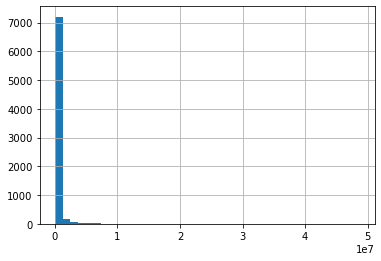

In [156]:
y_train_reg.hist(bins=40);

In [157]:
np.exp(np.log(y_train_reg+1))

3016    3.792141e+06
2569    5.656395e+05
2189    5.481558e+04
1166    7.762502e+05
959     1.000000e+00
            ...     
719     1.000000e+00
3975    2.223641e+06
9721    1.000000e+00
7684    8.350100e+04
1604    1.375100e+04
Name: sales_12M_2019, Length: 7503, dtype: float64

In [158]:
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor

In [159]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [160]:
def modified_log(x):
    x = np.where(x<0, 0, x)
    return np.log(x, where=x>0)

In [161]:
np.exp(4)

54.598150033144236

In [162]:
def modified_exp(x):
    x = np.where(x>15, 15, x)
    return np.expm1(x)

In [163]:
# ttr = TransformedTargetRegressor(
#         RidgeCV(), 
#         func=modified_log, 
#         inverse_func=modified_exp, 
#         check_inverse=False
# )

In [164]:
ttr = TransformedTargetRegressor(
        RidgeCV(), 
        func=np.log1p, 
        inverse_func=modified_exp, 
        check_inverse=False
)

In [165]:
ttr.fit(X_train_prepared, y_train_reg)

TransformedTargetRegressor(check_inverse=False, func=<ufunc 'log1p'>,
                           inverse_func=<function modified_exp at 0x7fe57b1a3160>,
                           regressor=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

[Back to Top](#Index)
# Make predictions

## Regression

In [166]:
test_preds = pd.Series(ttr.predict(X_test_prepared), index=y_test_reg.index)
test_preds

6307         3.064226
4521        97.427806
7859        12.029382
110          8.572280
4238        22.707121
            ...      
5710       292.812887
6026        79.301902
6246    782764.457249
8059     32928.482550
6438        31.448920
Length: 2502, dtype: float64

In [114]:
ttr.score(X_test_prepared, y_test_reg)

0.034779944499169435

[Back to Top](#Index)
### Make Function to output deciles

In [167]:
def output_deciles(model, X, y):
    results = pd.DataFrame(model.predict(X), index=y.index, columns=['prediction'])
    results['actual'] = y.values
    results['deciles'] = pd.qcut(results['prediction'], 10, labels=False)
    results['contact_id'] = results.index.map(adviser_lookup)
    return results.sort_values(by='prediction', ascending=False)

In [168]:
result_df = output_deciles(ttr, X_test_prepared, y_test_reg)
result_df

prediction        actual  deciles contact_id
6552  3.269016e+06  4.799405e+06        9    4458879
6436  3.269016e+06  2.563772e+04        9    4332201
1822  3.269016e+06  2.730628e+06        9    4468583
1511  3.269016e+06  5.033330e+05        9    0134746
2020  3.269016e+06  1.249126e+06        9    4357691
...            ...           ...      ...        ...
3037  5.778728e+00  0.000000e+00        0    4372593
28    5.397108e+00  0.000000e+00        0    4371164
8713  3.133218e+00  0.000000e+00        0    0286901
6307  3.064226e+00  0.000000e+00        0    4495550
8873  3.006718e+00  7.643961e+05        0    4376143

[2502 rows x 4 columns]

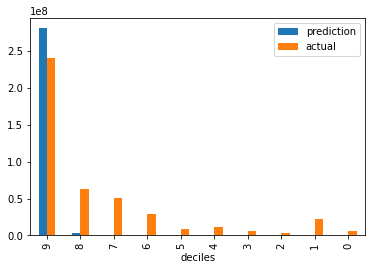

In [169]:
result_df.drop(columns='contact_id').groupby('deciles').sum().sort_index(ascending=False).plot(kind='bar');

[Back to Top](#Index)
## Classification

In [170]:
y_train_cl.value_counts()

0    5623
1    1880
Name: new_Fund_added_12M_2019, dtype: int64

In [171]:
y_test_cl.value_counts()

0    1861
1     641
Name: new_Fund_added_12M_2019, dtype: int64

In [172]:
from sklearn.ensemble import GradientBoostingClassifier

In [173]:
gbt_base = GradientBoostingClassifier()
gbt_base.fit(X_train_prepared, y_train_cl)
test_pred_class = gbt_base.predict(X_test_prepared)
print(classification_report(y_test_cl, test_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1861
           1       0.52      0.10      0.17       641

    accuracy                           0.75      2502
   macro avg       0.64      0.54      0.51      2502
weighted avg       0.70      0.75      0.68      2502



In [178]:
def output_deciles_class(model, X, y):
    results = pd.DataFrame(model.predict_proba(X)[:,1], index=y.index, columns=['prediction'])
    results['actual'] = y.values
    results['deciles'] = pd.qcut(results['prediction'], 10, labels=False)
    results['contact_id'] = results.index.map(adviser_lookup)
    return results.sort_values(by='prediction', ascending=False)

In [179]:
output_deciles_class(gbt_base, X_train_prepared, y_train_cl)

prediction  actual  deciles            contact_id
1783    0.932667       1        9  85101103674323007541
7325    0.914916       1        9               4417770
7629    0.914758       1        9               0215284
6867    0.914558       1        9               0232384
5035    0.899724       1        9               4316840
...          ...     ...      ...                   ...
7905    0.071795       0        0               0035524
5275    0.071207       0        0               0298171
9418    0.069437       0        0               4484142
974     0.067010       0        0               0025009
4707    0.052451       0        0               0349532

[7503 rows x 4 columns]

### Balance the data with `imbalanced-learn`

In [180]:
from imblearn.over_sampling import SMOTE

In [181]:
X_train_prepared.head(2)

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
3016          -0.196278               -0.101941            -0.213159   
2569          -0.083881               -0.092756            -0.213159   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
3016                 -0.202310               -0.568538   
2569                 -0.092965               -0.152531   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
3016                   -0.626347                 -0.431731   
2569                    0.181888                 -0.431731   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
3016                       -0.451524                    -0.784367   
2569                        0.284471                     0.213785   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
3016                        -0.870084                       -0.539912   
2569                         0.088964                       -0.539912   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
3016                            -0.566298        -0.688081         -0.887018   
2569                             0.770265         1.221427          3.897522   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
3016 -0.103503   -0.087693       -0.158849         0.090594        0.151819   
2569  0.005228   -0.087693       -0.143764         0.041500        0.123349   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
3016                -0.412074      -0.020322                 -0.090999   
2569                 0.418829       0.151346                 -0.064646   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
3016                    -0.046796     -0.012455        -0.027474   
2569                    -0.018608     -0.012455         0.109718   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
3016                  -0.044623           -0.029518      -0.039159  -0.082041   
2569                   0.455268           -0.029518      -0.039159  -0.082041   

      aum_P_ALT  aum_P_CEF  aum_P_ETF  aum_P_MF  aum_P_SMA  aum_P_UCITS  \
3016  -0.025459  -0.084761   -0.01501 -0.065685  -0.074575    -0.018967   
2569  -0.025459  -0.043016   -0.01501 -0.070373   0.157046    -0.018967   

      aum_P_UIT  
3016  -0.069496  
2569   0.002049

In [182]:
y_train_cl.value_counts()

0    5623
1    1880
Name: new_Fund_added_12M_2019, dtype: int64

In [183]:
# instantiate SMOTENC
smote = SMOTE(random_state=0)

# balance data
X_smote, y_smote = smote.fit_resample(X_train_prepared, y_train_cl)

In [184]:
y_smote.value_counts()

1    5623
0    5623
Name: new_Fund_added_12M_2019, dtype: int64

In [185]:
gbt_base2 = GradientBoostingClassifier()
gbt_base2.fit(X_smote, y_smote)
test_pred_class2 = gbt_base2.predict(X_test_prepared)
print(classification_report(y_test_cl, test_pred_class2))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1861
           1       0.46      0.54      0.50       641

    accuracy                           0.72      2502
   macro avg       0.65      0.66      0.65      2502
weighted avg       0.74      0.72      0.73      2502



# Capstone Week 7
---

# Index
- [Capstone Objectives](#Capstone-Objectives)
- [Read in Data](#Read-in-Data)
    - [Merge 2018 and 2019](#Merge-2018-and-2019)
    - [Make advisor dictionary mapper](#Make-advisor-dictionary-mapper)
- [Data Cleaning](#Data-Cleaning)
    - [Train-Test-Split](#Train-Test-Split)
    - [Custom Cleaning Functions](#Custom-Cleaning-Functions)
    - [Create Cleaning Pipeline](#Create-Cleaning-Pipeline)
- [Model building](#Model-building)
- [Make predictions](#Make-predictions)
    - [Regression](#Regression)
        - [Make Function to output deciles](#Make-Function-to-output-deciles)
    - [Classification](#Classification)
        - [Balance the data with `imbalanced-learn`](#Balance-the-data-with-imbalanced-learn)
    - [Model Interpretation](#Model-Interpretation)
- [Scratch Work](#Scratch-Work)
    - [Feature Engineering](#Feature-Engineering)
        - [Variable Inflation Factor (VIF)](#Variable-Inflation-Factor-(VIF))
    - [Residuals](#Residuals)
    - [Condition number](#Condition-number)

# Capstone Objectives
- Assist sales and marketing by improving their targeting
- Predict sales for 2019 using the data for 2018
- Estimate the probability of adding a new fund in 2019

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report

pd.set_option('display.max_columns', 50)

[Back to Top](#Index)
# Read in Data

In [187]:
df18 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions18")
df19 = pd.read_excel("Transaction Data.xlsx", sheet_name="Transactions19")
firm = pd.read_excel("Firm Information.xlsx", sheet_name="Rep summary")

In [280]:
df19.head()

CONTACT_ID  sales_12M  new_Fund_added_12M refresh_date
0  10761171685327323628    4484.20                 NaN   2019-12-31
1  85102132684855362312        NaN                 NaN   2019-12-31
2  85101122533782678327  128362.82                 NaN   2019-12-31
3               4478952  160930.89                 1.0   2019-12-31
4  85102153463467397715        NaN                 NaN   2019-12-31

## Merge 2018 and 2019

In [189]:
df = pd.merge(
    df18, 
    df19, 
    on='CONTACT_ID',
    suffixes=['_2018', '_2019']
)
print(df.shape)

(10005, 41)


In [190]:
df.head()

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  \
0               0047433               21.0                    38.0   
1               4461312                NaN                     NaN   
2               4491079                NaN                     NaN   
3               0107408               20.0                     NaN   
4  85101140503769936458                NaN                     NaN   

   no_of_sales_12M_10K  no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
0                  NaN                       1.0                     5.0   
1                  NaN                       NaN                     NaN   
2                  NaN                       NaN                     NaN   
3                  2.0                       NaN                     1.0   
4                  NaN                       NaN                     NaN   

   no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
0                         5.0                       NaN   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       1.0   
4                         NaN                       NaN   

   no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
0                             1.0                          2.0   
1                             NaN                          NaN   
2                             NaN                          NaN   
3                             NaN                          1.0   
4                             NaN                          NaN   

   no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
0                              2.0                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             1.0   
4                              NaN                             NaN   

   no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
0                                  1.0              8.0               1.0   
1                                  NaN              1.0               1.0   
2                                  NaN              NaN               NaN   
3                                  NaN              1.0               1.0   
4                                  NaN              NaN               NaN   

         AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
0  237480.11       250.0         19682.0        -1496.745     -102496.165   
1   19629.00         NaN             NaN              NaN             NaN   
2    1758.70         NaN             NaN              NaN             NaN   
3   57943.00      5459.0         52484.0              NaN             NaN   
4   -8573.59         NaN             NaN              NaN             NaN   

   new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
0                      NaN      -47342.32                 284737.93   
1                      NaN           0.00                  19629.00   
2                      NaN           0.00                   1758.70   
3                      1.0           0.00                      0.00   
4                      NaN       -8573.59                      0.00   

   aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
0                         84.5           0.0              0.0   
1                          0.0           0.0              0.0   
2                          0.0           0.0              0.0   
3                      57943.0           0.0              0.0   
4                          0.0           0.0              0.0   

   aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
0                        0.0                 0.0            0.0        0.0   
1                        0.0                 0.0            0.

## Make advisor dictionary mapper

In [191]:
adviser_lookup = {idx: contact_id for idx, contact_id in enumerate(df['CONTACT_ID'])}

In [192]:
adviser_lookup[123]

'85201142414218755394'

[Back to Top](#Index)
# Data Cleaning

In [193]:
# make a variable to keep all of the columns we want to drop
COLS_TO_DROP = [
    'refresh_date_2019', 'refresh_date_2018', 'CONTACT_ID', 
]

COLS_TO_KEEP = [
    'no_of_sales_12M_1', 'no_of_Redemption_12M_1', 'no_of_sales_12M_10K',
    'no_of_Redemption_12M_10K', 'no_of_funds_sold_12M_1',
    'no_of_funds_redeemed_12M_1', 'no_of_fund_sales_12M_10K',
    'no_of_funds_Redemption_12M_10K', 'no_of_assetclass_sold_12M_1',
    'no_of_assetclass_redeemed_12M_1', 'no_of_assetclass_sales_12M_10K',
    'no_of_assetclass_Redemption_12M_10K', 'No_of_fund_curr',
    'No_of_asset_curr', 'AUM', 'sales_curr', 'sales_12M_2018',
    'redemption_curr', 'redemption_12M', 'new_Fund_added_12M_2018',
    'aum_AC_EQUITY', 'aum_AC_FIXED_INCOME_MUNI',
    'aum_AC_FIXED_INCOME_TAXABLE', 'aum_AC_MONEY', 'aum_AC_MULTIPLE',
    'aum_AC_PHYSICAL_COMMODITY', 'aum_AC_REAL_ESTATE', 'aum_AC_TARGET',
    'aum_P_529', 'aum_P_ALT', 'aum_P_CEF', 'aum_P_ETF', 'aum_P_MF',
    'aum_P_SMA', 'aum_P_UCITS', 'aum_P_UIT'
]

FIRM_COLS = ['Contact ID', 'Channel','Sub channel',]

# Make `Firm` data pipeline

In [194]:
firm_lookup = {idx: contact_id for idx, contact_id in enumerate(firm['Contact ID'])}

In [195]:
firm_merged = pd.merge(df, firm, left_on="CONTACT_ID", right_on='Contact ID')
firm_merged.head(1)

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
0    0047433               21.0                    38.0                  NaN   

   no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
0                       1.0                     5.0   

   no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
0                         5.0                       NaN   

   no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
0                             1.0                          2.0   

   no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
0                              2.0                             NaN   

   no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
0                                  1.0              8.0               1.0   

         AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
0  237480.11       250.0         19682.0        -1496.745     -102496.165   

   new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
0                      NaN      -47342.32                 284737.93   

   aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
0                         84.5           0.0              0.0   

   aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
0                        0.0                 0.0            0.0        0.0   

   aum_P_ALT  aum_P_CEF  aum_P_ETF   aum_P_MF  aum_P_SMA  aum_P_UCITS  \
0        0.0        0.0        0.0  122866.04  114614.07          0.0   

   aum_P_UIT refresh_date_2018  sales_12M_2019  new_Fund_added_12M_2019  \
0        0.0        2018-12-31       18633.105                      NaN   

  refresh_date_2019 Contact ID  CustomerID  Firm ID             Office ID  \
0        2019-12-31    0047433         240  1688552  85101152293608716061   

                  Channel Sub channel                     Firm name  
0  National Broker-Dealer        NACS  UBS Financial Services, Inc.

In [196]:
firm_merged[FIRM_COLS]

Contact ID                 Channel Sub channel
0                   0047433  National Broker-Dealer        NACS
1                   4461312                    Dual         IBD
2                   4491079      Independent Dealer         RIA
3                   0107408      Independent Dealer         IBD
4      85101140503769936458      Independent Dealer         RIA
...                     ...                     ...         ...
10000               4354749      Independent Dealer         IBD
10001  85202110743700895498      Independent Dealer         IBD
10002  85101153615072327284  National Broker-Dealer        NACS
10003               4486975       Fee-Based Adviser         IBD
10004               0185870  National Broker-Dealer        NACS

[10005 rows x 3 columns]

In [197]:
# def firm_column_selector(df):
#     return df[FIRM_COLS].drop(columns='Contact ID', axis=1)

In [198]:
# firm_column_selector_trans = FunctionTransformer(firm_column_selector)

In [199]:
# from sklearn.preprocessing import OneHotEncoder

In [200]:
# firm_pipe = Pipeline([
#     ('firm_column_selector_trans', firm_column_selector_trans),
#     ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
# ])

# Do rest of Pipeline

In [201]:
X = df.drop(['sales_12M_2019', 'new_Fund_added_12M_2019'], axis=1)
y_reg = df['sales_12M_2019']
y_cl = df['new_Fund_added_12M_2019']

## Train-Test-Split

In [202]:
y_reg.isnull().value_counts()

False    5074
True     4931
Name: sales_12M_2019, dtype: int64

In [203]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=24, stratify=y_reg.isnull())
y_train_cl, y_test_cl = y_cl[y_train_reg.index], y_cl[y_test_reg.index]

In [204]:
y_train_reg.isnull().value_counts(normalize=True)

False    0.50713
True     0.49287
Name: sales_12M_2019, dtype: float64

In [205]:
y_test_reg.isnull().value_counts(normalize=True)

False    0.507194
True     0.492806
Name: sales_12M_2019, dtype: float64

## Custom Cleaning Functions

In [206]:
def extract_columns(df):
    '''extract out columns not listed in COLS_TO_DROP variable'''
    cols_to_keep = [col for col in df.columns if col not in COLS_TO_DROP]
    return df.loc[:, cols_to_keep].copy()

def fillna_values(df):
    '''fill nan values with zero'''
    if isinstance(df, type(pd.Series(dtype='float64'))):
        return df.fillna(0)
    elif isinstance(df, type(pd.DataFrame())):
        num_df = df.select_dtypes(include=['number']).fillna(0)
        non_num_df = df.select_dtypes(exclude=['number'])
        return pd.concat([num_df, non_num_df], axis=1)
    else:
        return np.nan_to_num(df)

def negative_to_zero(series):
    '''fill negative values to zero'''
    if isinstance(series, type(pd.Series(dtype='float64'))):
        return series.apply(lambda x: max(0, x))
    else:
        return series
    
def bin_y_class(series):
    series = series.apply(lambda x: 1 if x >=1 else 0)
    return series

cat_cols = list(X_train.select_dtypes(include=['object']).columns)
def dummy_col_adder(array):
    dummy_cols = []
    for col, cat_set in zip(cat_cols, feat_pipe.named_steps['OneHotEncoder'].categories_):
        for cat in cat_set:
            dummy_cols.append(col+'_'+str(cat))
    return pd.DataFrame(array, columns=dummy_cols)
# dummy_col_transformer = FunctionTransformer(dummy_col_adder, validate=False)

[Back to Top](#Index)
## Create Cleaning Pipeline

Convert functions to transformers

In [207]:
extract_columns_trans = FunctionTransformer(extract_columns)
fillna_values_trans = FunctionTransformer(fillna_values)
negative_to_zero_trans = FunctionTransformer(negative_to_zero)
bin_y_class_trans = FunctionTransformer(bin_y_class)

Make pipeline for target variables

In [208]:
reg_targ_pipe = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
    ('negative_to_zero', negative_to_zero_trans),
])

class_targ_pipe = Pipeline([
    ('fillna_values_trans', fillna_values_trans),
    ('bin_y_class_trans', bin_y_class_trans),
])

Fit and transform TRAINING

In [210]:
y_train_reg = reg_targ_pipe.fit_transform(y_train_reg)
y_train_cl = class_targ_pipe.fit_transform(y_train_cl)

Transform only TESTING

In [211]:
y_test_reg = reg_targ_pipe.transform(y_test_reg) 
y_test_cl = class_targ_pipe.transform(y_test_cl)

In [212]:
y_test_cl.value_counts()

0    1861
1     641
Name: new_Fund_added_12M_2019, dtype: int64

Make pipeline for features

In [213]:
X_train.head()

CONTACT_ID  no_of_sales_12M_1  no_of_Redemption_12M_1  \
3016  10761190984309697901                NaN                     NaN   
2569               0041111               12.0                     2.0   
2189  85101153244714763889                NaN                     NaN   
1166               4339054                4.0                     7.0   
959   10751192894621910308                NaN                     NaN   

      no_of_sales_12M_10K  no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
3016                  NaN                       NaN                     NaN   
2569                  NaN                       1.0                     1.0   
2189                  NaN                       NaN                     NaN   
1166                  2.0                       3.0                     2.0   
959                   NaN                       NaN                     NaN   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
3016                         NaN                       NaN   
2569                         2.0                       NaN   
2189                         NaN                       NaN   
1166                         4.0                       1.0   
959                          NaN                       NaN   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
3016                             NaN                          NaN   
2569                             1.0                          1.0   
2189                             NaN                          NaN   
1166                             2.0                          2.0   
959                              NaN                          NaN   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
3016                              NaN                             NaN   
2569                              1.0                             NaN   
2189                              NaN                             NaN   
1166                              2.0                             1.0   
959                               NaN                             NaN   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
3016                                  NaN              NaN               NaN   
2569                                  1.0              6.0               5.0   
2189                                  NaN              NaN               NaN   
1166                                  2.0              9.0               2.0   
959                                   NaN              NaN               NaN   

               AUM  sales_curr  sales_12M_2018  redemption_curr  \
3016           NaN         NaN             NaN              NaN   
2569  3.795556e+05         NaN    16836.479175         -10575.9   
2189           NaN         NaN             NaN              NaN   
1166 -1.119938e+06         NaN   303342.790000              NaN   
959            NaN         NaN             NaN              NaN   

      redemption_12M  new_Fund_added_12M_2018  aum_AC_EQUITY  \
3016             NaN                      NaN            NaN   
2569   -23998.869873                      1.0   2.316456e+05   
2189             NaN                      NaN            NaN   
1166  -366493.380000                      NaN  -1.504295e+06   
959              NaN                      NaN            NaN   

      aum_AC_FIXED_INCOME_MUNI  aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  \
3016                       NaN                          NaN           NaN   
2569              79576.588224                 16836.479175           0.0   
2189                       NaN                          NaN           NaN   
1166             377202.510000                  7154.470000           0.0   
959                        NaN                          NaN           NaN   

      aum_AC_MULTIPLE  aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  \
3016              NaN                        NaN                 NaN   

In [214]:
ss = StandardScaler()
ss.fit_transform(X_train[['no_of_sales_12M_1', 'no_of_Redemption_12M_1']].fillna(0), y_train_reg)

array([[-0.19627782, -0.10194059],
       [-0.08388081, -0.09275606],
       [-0.19627782, -0.10194059],
       ...,
       [-0.19627782, -0.10194059],
       [-0.19627782, -0.10194059],
       [-0.19627782, -0.09275606]])

In [215]:
ss.transform(X_train[['no_of_sales_12M_1', 'no_of_Redemption_12M_1']].fillna(0))

array([[-0.19627782, -0.10194059],
       [-0.08388081, -0.09275606],
       [-0.19627782, -0.10194059],
       ...,
       [-0.19627782, -0.10194059],
       [-0.19627782, -0.10194059],
       [-0.19627782, -0.09275606]])

In [216]:
ss.transform(X_test[['no_of_sales_12M_1', 'no_of_Redemption_12M_1']].fillna(0))

array([[-0.19627782, -0.10194059],
       [-0.17754498, -0.10194059],
       [-0.19627782, -0.10194059],
       ...,
       [ 0.97452437,  1.2711469 ],
       [-0.05578155,  0.13226497],
       [-0.19627782, -0.08357153]])

In [217]:
feat_pipe = Pipeline([
    ('extract_columns_trans', extract_columns_trans),
    ('fillna_values_trans', fillna_values_trans),
    ('StandardScaler', StandardScaler()),
])

# fit and transform TRAINING
train_array = feat_pipe.fit(X_train, y_train_reg).transform(X_train)

# Give training data row and column labels back
X_train_prepared = pd.DataFrame(
    train_array,
    index=X_train.index,
    columns=COLS_TO_KEEP
)

# use `FeatureUnion` to run multiple pipelines at once

In [218]:
# from sklearn.pipeline import FeatureUnion

In [219]:
# feat_union = FeatureUnion([
#     ('feat_pipe', feat_pipe),
#     ('firm_pipe', firm_pipe)
# ])

In [220]:
# firm_train = firm.loc[X_train.index, :]
# firm_test = firm.loc[X_test.index, :]
# all_data = pd.concat([X_train, firm_train], axis=1)

In [221]:
# feat_union.fit_transform(all_data, y_train_reg)

In [222]:
X_train_prepared.head(2)

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
3016          -0.196278               -0.101941            -0.213159   
2569          -0.083881               -0.092756            -0.213159   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
3016                 -0.202310               -0.568538   
2569                 -0.092965               -0.152531   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
3016                   -0.626347                 -0.431731   
2569                    0.181888                 -0.431731   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
3016                       -0.451524                    -0.784367   
2569                        0.284471                     0.213785   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
3016                        -0.870084                       -0.539912   
2569                         0.088964                       -0.539912   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
3016                            -0.566298        -0.688081         -0.887018   
2569                             0.770265         1.221427          3.897522   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
3016 -0.103503   -0.087693       -0.158849         0.090594        0.151819   
2569  0.005228   -0.087693       -0.143764         0.041500        0.123349   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
3016                -0.412074      -0.020322                 -0.090999   
2569                 0.418829       0.151346                 -0.064646   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
3016                    -0.046796     -0.012455        -0.027474   
2569                    -0.018608     -0.012455         0.109718   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
3016                  -0.044623           -0.029518      -0.039159  -0.082041   
2569                   0.455268           -0.029518      -0.039159  -0.082041   

      aum_P_ALT  aum_P_CEF  aum_P_ETF  aum_P_MF  aum_P_SMA  aum_P_UCITS  \
3016  -0.025459  -0.084761   -0.01501 -0.065685  -0.074575    -0.018967   
2569  -0.025459  -0.043016   -0.01501 -0.070373   0.157046    -0.018967   

      aum_P_UIT  
3016  -0.069496  
2569   0.002049

**TRANSFORM** the test set (Do NOT fit the pipeline on testing!)

In [223]:
X_test_prepared = pd.DataFrame(
    feat_pipe.transform(X_test),
    index=X_test.index,
    columns=COLS_TO_KEEP
)

In [224]:
X_test_prepared.head(2)

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
6307          -0.196278               -0.101941            -0.213159   
4521          -0.177545               -0.101941            -0.213159   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
6307                  -0.20231               -0.568538   
4521                  -0.20231               -0.152531   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
6307                   -0.626347                 -0.431731   
4521                   -0.626347                 -0.431731   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
6307                       -0.451524                    -0.784367   
4521                       -0.451524                     0.213785   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
6307                        -0.870084                       -0.539912   
4521                        -0.870084                       -0.539912   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
6307                            -0.566298        -0.688081         -0.887018   
4521                            -0.566298        -0.369830          0.069890   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
6307 -2.342891   -0.087693       -0.158849         0.090594        0.151819   
4521 -0.098414   -0.087693       -0.157788         0.090594        0.151819   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
6307                -0.412074      -0.024431                 -2.677914   
4521                -0.412074      -0.020511                 -0.090999   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
6307                    -0.046796     -0.012455        -0.027474   
4521                    -0.016625     -0.012455        -0.027474   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
6307                  -0.044623           -0.029518      -0.039159  -0.082041   
4521                  -0.044623           -0.029518      -0.039159  -0.082041   

      aum_P_ALT  aum_P_CEF  aum_P_ETF  aum_P_MF  aum_P_SMA  aum_P_UCITS  \
6307  -0.025459  -0.084761   -0.01501 -0.073010  -4.915368    -0.018967   
4521  -0.025459  -0.084761   -0.01501 -0.059829  -0.074575    -0.018967   

      aum_P_UIT  
6307  -0.069496  
4521  -0.069496

[Back to Top](#Index)
# Model building

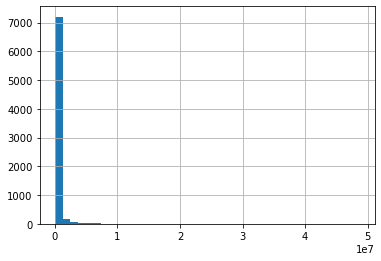

In [225]:
y_train_reg.hist(bins=40);

In [226]:
np.exp(np.log(y_train_reg+1))

3016    3.792141e+06
2569    5.656395e+05
2189    5.481558e+04
1166    7.762502e+05
959     1.000000e+00
            ...     
719     1.000000e+00
3975    2.223641e+06
9721    1.000000e+00
7684    8.350100e+04
1604    1.375100e+04
Name: sales_12M_2019, Length: 7503, dtype: float64

In [227]:
from sklearn.linear_model import RidgeCV
from sklearn.compose import TransformedTargetRegressor

In [228]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# import xgboost as xgb

In [229]:
def modified_log(x):
    x = np.where(x<0, 0, x)
    return np.log(x, where=x>0)

In [230]:
def modified_exp(x):
    x = np.where(x>15, 15, x)
    return np.expm1(x)

In [231]:
# ttr = TransformedTargetRegressor(
#         RidgeCV(), 
#         func=modified_log, 
#         inverse_func=modified_exp, 
#         check_inverse=False
# )

In [232]:
ttr = TransformedTargetRegressor(
        RidgeCV(), 
        func=np.log1p, 
        inverse_func=modified_exp, 
        check_inverse=False
)

In [233]:
ttr.fit(X_train_prepared, y_train_reg)

TransformedTargetRegressor(check_inverse=False, func=<ufunc 'log1p'>,
                           inverse_func=<function modified_exp at 0x7fe594850160>,
                           regressor=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

[Back to Top](#Index)
# Make predictions

## Regression

In [234]:
test_preds = pd.Series(ttr.predict(X_test_prepared), index=y_test_reg.index)
test_preds

6307         3.064226
4521        97.427806
7859        12.029382
110          8.572280
4238        22.707121
            ...      
5710       292.812887
6026        79.301902
6246    782764.457249
8059     32928.482550
6438        31.448920
Length: 2502, dtype: float64

In [235]:
ttr.score(X_test_prepared, y_test_reg)

0.034779944499169435

[Back to Top](#Index)
### Make Function to output deciles

In [236]:
def output_deciles(model, X, y):
    results = pd.DataFrame(model.predict(X), index=y.index, columns=['prediction'])
    results['actual'] = y.values
    results['deciles'] = pd.qcut(results['prediction'], 10, labels=False)
    results['contact_id'] = results.index.map(adviser_lookup)
    return results

In [237]:
result_df = output_deciles(ttr, X_test_prepared, y_test_reg)
result_df

prediction     actual  deciles            contact_id
6307       3.064226       0.00        0               4495550
4521      97.427806       0.00        5  85102132724913032579
7859      12.029382       0.00        3               4380705
110        8.572280   25093.00        1  85102151525164324880
4238      22.707121     742.00        4  85101111303291084757
...             ...        ...      ...                   ...
5710     292.812887       0.00        6               0056157
6026      79.301902  750051.80        5  85202111474542078472
6246  782764.457249  264238.31        9  85201140523379459042
8059   32928.482550   37576.85        8  85202111325248394877
6438      31.448920       0.00        4               0315144

[2502 rows x 4 columns]

In [238]:
result_df[result_df['deciles'] == 9]

prediction        actual  deciles            contact_id
2990  5.409740e+05  7.189395e+04        9               4353864
6452  6.952845e+04  7.314998e+06        9  85202112173254510211
324   2.408189e+06  3.341190e+06        9  85101122913914154200
8940  1.683491e+06  1.319240e+06        9               4357613
4194  3.269016e+06  1.225482e+06        9               4434645
...            ...           ...      ...                   ...
4048  5.247587e+04  2.865495e+05        9               4331182
6461  1.150358e+05  7.594300e+04        9  85201131374086410352
8853  9.317475e+05  9.053720e+05        9               0347664
6265  7.345901e+04  9.170000e+02        9               4493012
6246  7.827645e+05  2.642383e+05        9  85201140523379459042

[251 rows x 4 columns]

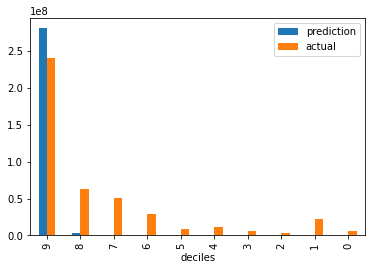

In [239]:
result_df.drop(columns='contact_id').groupby('deciles').sum().sort_index(ascending=False).plot(kind='bar');

[Back to Top](#Index)
## Classification

In [240]:
y_train_cl.value_counts()

0    5623
1    1880
Name: new_Fund_added_12M_2019, dtype: int64

In [241]:
y_test_cl.value_counts()

0    1861
1     641
Name: new_Fund_added_12M_2019, dtype: int64

In [242]:
from sklearn.ensemble import GradientBoostingClassifier

In [243]:
gbt_base = GradientBoostingClassifier()
gbt_base.fit(X_train_prepared, y_train_cl)
test_pred_class = gbt_base.predict(X_test_prepared)
print(classification_report(y_test_cl, test_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1861
           1       0.52      0.10      0.17       641

    accuracy                           0.75      2502
   macro avg       0.64      0.53      0.51      2502
weighted avg       0.70      0.75      0.68      2502



In [244]:
def output_deciles_class(model, X, y):
    results = pd.DataFrame(model.predict_proba(X)[:,1], index=y.index, columns=['prediction'])
    results['actual'] = y.values
    results['deciles'] = pd.qcut(results['prediction'], 10, labels=False)
    results['contact_id'] = results.index.map(adviser_lookup)
    return results.sort_values(by='prediction', ascending=False)

In [245]:
output_deciles_class(gbt_base, X_train_prepared, y_train_cl)

prediction  actual  deciles            contact_id
1783    0.932667       1        9  85101103674323007541
7325    0.914916       1        9               4417770
7629    0.914758       1        9               0215284
6867    0.914558       1        9               0232384
5035    0.899724       1        9               4316840
...          ...     ...      ...                   ...
7905    0.071795       0        0               0035524
5275    0.071207       0        0               0298171
9418    0.069437       0        0               4484142
974     0.067010       0        0               0025009
4707    0.052451       0        0               0349532

[7503 rows x 4 columns]

### Balance the data with `imbalanced-learn`

In [246]:
from imblearn.over_sampling import SMOTE

In [247]:
X_train_prepared.head(2)

no_of_sales_12M_1  no_of_Redemption_12M_1  no_of_sales_12M_10K  \
3016          -0.196278               -0.101941            -0.213159   
2569          -0.083881               -0.092756            -0.213159   

      no_of_Redemption_12M_10K  no_of_funds_sold_12M_1  \
3016                 -0.202310               -0.568538   
2569                 -0.092965               -0.152531   

      no_of_funds_redeemed_12M_1  no_of_fund_sales_12M_10K  \
3016                   -0.626347                 -0.431731   
2569                    0.181888                 -0.431731   

      no_of_funds_Redemption_12M_10K  no_of_assetclass_sold_12M_1  \
3016                       -0.451524                    -0.784367   
2569                        0.284471                     0.213785   

      no_of_assetclass_redeemed_12M_1  no_of_assetclass_sales_12M_10K  \
3016                        -0.870084                       -0.539912   
2569                         0.088964                       -0.539912   

      no_of_assetclass_Redemption_12M_10K  No_of_fund_curr  No_of_asset_curr  \
3016                            -0.566298        -0.688081         -0.887018   
2569                             0.770265         1.221427          3.897522   

           AUM  sales_curr  sales_12M_2018  redemption_curr  redemption_12M  \
3016 -0.103503   -0.087693       -0.158849         0.090594        0.151819   
2569  0.005228   -0.087693       -0.143764         0.041500        0.123349   

      new_Fund_added_12M_2018  aum_AC_EQUITY  aum_AC_FIXED_INCOME_MUNI  \
3016                -0.412074      -0.020322                 -0.090999   
2569                 0.418829       0.151346                 -0.064646   

      aum_AC_FIXED_INCOME_TAXABLE  aum_AC_MONEY  aum_AC_MULTIPLE  \
3016                    -0.046796     -0.012455        -0.027474   
2569                    -0.018608     -0.012455         0.109718   

      aum_AC_PHYSICAL_COMMODITY  aum_AC_REAL_ESTATE  aum_AC_TARGET  aum_P_529  \
3016                  -0.044623           -0.029518      -0.039159  -0.082041   
2569                   0.455268           -0.029518      -0.039159  -0.082041   

      aum_P_ALT  aum_P_CEF  aum_P_ETF  aum_P_MF  aum_P_SMA  aum_P_UCITS  \
3016  -0.025459  -0.084761   -0.01501 -0.065685  -0.074575    -0.018967   
2569  -0.025459  -0.043016   -0.01501 -0.070373   0.157046    -0.018967   

      aum_P_UIT  
3016  -0.069496  
2569   0.002049

In [248]:
y_train_cl.value_counts()

0    5623
1    1880
Name: new_Fund_added_12M_2019, dtype: int64

In [249]:
# instantiate SMOTENC
smote = SMOTE(random_state=0)

# balance data
X_smote, y_smote = smote.fit_resample(X_train_prepared, y_train_cl)

In [250]:
y_smote.value_counts()

1    5623
0    5623
Name: new_Fund_added_12M_2019, dtype: int64

In [251]:
gbt_base2 = GradientBoostingClassifier()
gbt_base2.fit(X_smote, y_smote)
test_pred_class2 = gbt_base2.predict(X_test_prepared)
print(classification_report(y_test_cl, test_pred_class2))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1861
           1       0.46      0.54      0.50       641

    accuracy                           0.72      2502
   macro avg       0.65      0.66      0.65      2502
weighted avg       0.74      0.72      0.73      2502



[Back to Top](#Index)
# Model Interpretation

Using Shapley Values to Interpret Models: see [`shap`](https://github.com/slundberg/shap) package

In [256]:
# !pip install shap
# or
!conda install -yc conda-forge shap

Solving environment: done

## Package Plan ##

  environment location: /Users/serdarteterbas/opt/miniconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cloudpickle-1.6.0          |             py_0          22 KB  conda-forge
    cytoolz-0.11.0             |   py38h1130bcf_1         339 KB  conda-forge
    dask-core-2.30.0           |             py_0         639 KB  conda-forge
    imageio-2.9.0              |             py_0         3.1 MB  conda-forge
    scikit-image-0.16.2        |   py38h4f17bb1_0        24.2 MB  conda-forge
    shap-0.36.0                |   py38h6be0db6_0         484 KB  conda-forge
    slicer-0.0.3               |             py_0          14 KB  conda-forge
    toolz-0.11.1               |             py_0          46 KB  conda-forge
    ------------------------------------------------------------
                    

In [257]:
import shap

In [258]:
shap.initjs()

In [259]:
# initialize explainer
explainer = shap.LinearExplainer(ttr.regressor_, X_train_prepared)

# get shapley values using your data (like .fit method in sklearn)
shap_values = explainer.shap_values(X_test_prepared)

# visualize the first prediction's explaniation
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test_prepared.iloc[0, :])

In [260]:
# base value is mean of all training prediction
np.mean(ttr.regressor_.predict(X_train_prepared))

5.316026770041996

In [261]:
# the prediction for this advisor is the bold number
ttr.regressor_.predict(X_test_prepared.iloc[0, :].values.reshape(1,-1))

array([1.40222323])

In [262]:
# the numbers next to the features are the values for each feature
X_test_prepared.loc[6307, 'no_of_assetclass_sold_12M_1']

-0.7843666563004901

In [263]:
# The low value in 'no_of_assetclass_sold_12M_1' pushes the prediction down
X_test_prepared['no_of_assetclass_sold_12M_1'].describe()

count    2502.000000
mean        0.001548
std         1.011607
min        -0.784367
25%        -0.784367
50%        -0.784367
75%         0.213785
max         4.206392
Name: no_of_assetclass_sold_12M_1, dtype: float64

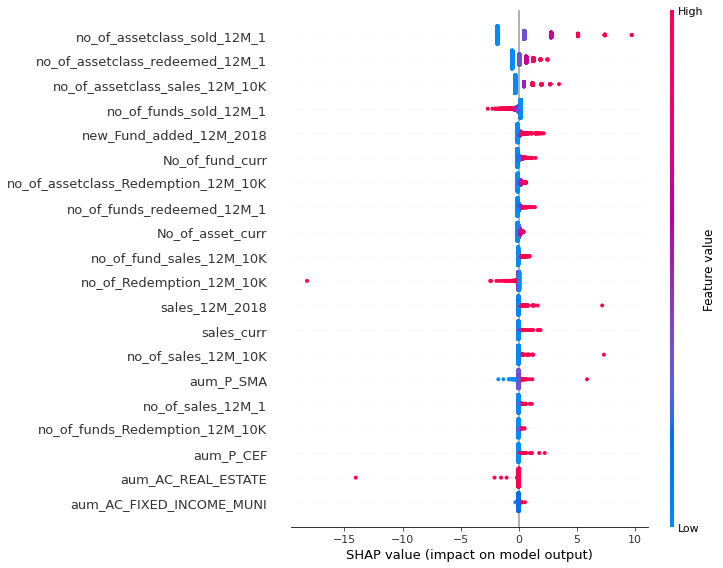

In [264]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test_prepared)

The above plot shows an overview of which features are most important for a model. The first features have the higest shapley value magnitudes over all samples. The colors represent the feature value. For example, a **high** number of `no_of_assetclass_sold_12M_1` **increases** the sales amount.

In [265]:
k = 1000
sample = X_test_prepared.sample(k, random_state=0)
shap_sample = pd.DataFrame(shap_values, index=X_test_prepared.index).loc[sample.index, :].values

In [266]:
# WARNING! This can be slow...
shap.force_plot(explainer.expected_value, shap_sample, sample)

In [267]:
# let's look at the top decile
reg_results_df = output_deciles(ttr, X_test_prepared, y_test_reg)
reg_results_df[reg_results_df['deciles'] == 9]

prediction        actual  deciles            contact_id
2990  5.409740e+05  7.189395e+04        9               4353864
6452  6.952845e+04  7.314998e+06        9  85202112173254510211
324   2.408189e+06  3.341190e+06        9  85101122913914154200
8940  1.683491e+06  1.319240e+06        9               4357613
4194  3.269016e+06  1.225482e+06        9               4434645
...            ...           ...      ...                   ...
4048  5.247587e+04  2.865495e+05        9               4331182
6461  1.150358e+05  7.594300e+04        9  85201131374086410352
8853  9.317475e+05  9.053720e+05        9               0347664
6265  7.345901e+04  9.170000e+02        9               4493012
6246  7.827645e+05  2.642383e+05        9  85201140523379459042

[251 rows x 4 columns]

Select only rows in testing from top decile

In [269]:
top_decile_test_idx = reg_results_df[reg_results_df['deciles'] == 9].index
top_decile_test = X_test_prepared.loc[top_decile_test_idx, :]
top_decile_shap = pd.DataFrame(shap_values, index=X_test_prepared.index).loc[top_decile_test_idx, :].values

In [270]:
shap.force_plot(explainer.expected_value, top_decile_shap, top_decile_test)

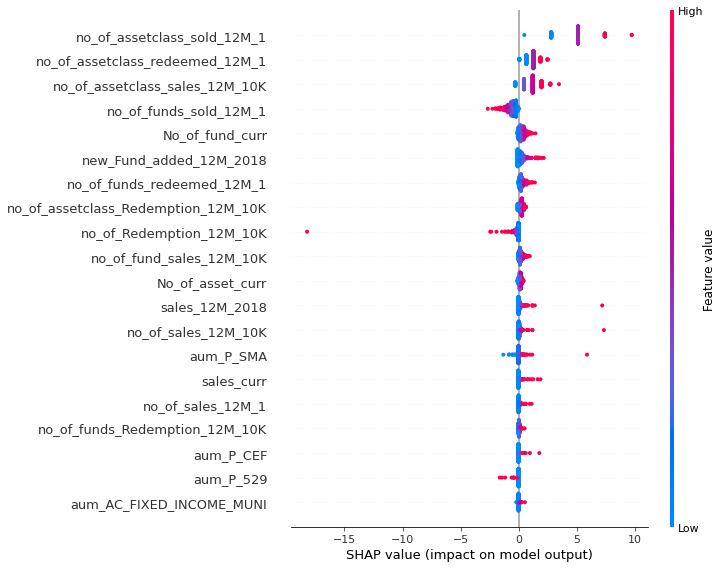

In [271]:
shap.summary_plot(top_decile_shap, top_decile_test)

[Back to Top](#Index)
# Scratch Work

## Lift Chart Evaluation

In [272]:
conda install -yc conda-forge scikit-plot

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [273]:
import scikitplot as skplt

In [274]:
test_pred_proba = gbt_base2.predict_proba(X_test_prepared)

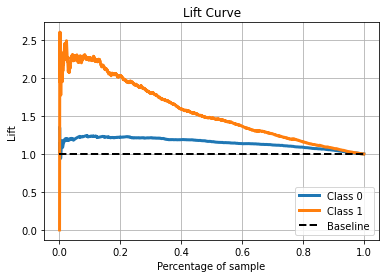

In [275]:
skplt.metrics.plot_lift_curve(y_test_cl, test_pred_proba);